In [2]:
import numpy as np
from scipy.stats import norm

class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    ITALICS = '\033[10m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

# FX Introduction


## Some FX terminologies / conventions
- Swap /forward points = dfiference between the spot rate and forward rate
- 1 pip = smallest increment in the FX rate. Usually 0.0001, with the exception of 0.01 for USDJPY
- A figure = 100 pips
- FX transactions and positions are usually quoted in CCY1 terms while the P&L from the trade is naturally generated in CCY2.


# FX Derivatives
Three main product ares with increasing complexity
1. Spot
1. Swaps / Forwards
1. Derivatives: Vanilla call / put options

## Two Main kinds of vanilla options
1. European vanilla options can be exercised only at the option maturity.
2. American vanilla options can be exercised at any time before the option maturity.

## Vanilla FX option contract details
1. CCY pair
1. Call or Put
1. Maturity / Expiry
1. Cut: The exact time on the expiry date at which the option matures. The two most common cuts in G10 currency pairs are:
    - New York (NY) 10 a.m. New York time, which is usually 3 p.m. London time
    - Tokyo (TOK): 3 p.m. Tokyo time, 6 a.m. or 7 a.m. London time.
1. Strike
1. Notional: The amount of cash (usually expressed in CCY1 terms) that can be exchanged at maturity.

## Some Practical Aspects
- FX derivatives trading volumes $\approx 5\%$ of total FX trading volumes
- Majority of FX derivatives trading occurs in contracts with maturities of one year and under. 
- G10 currency pairs vanilla options are usually **physically delivered** (an exchange of cash flows occurs).
- EM currency pairs are usually cash settled in USD. 
- bid-ask spread exists to cover the market maker for the potential risk of holding the position over time. 
- Bid-ask spread is a function of:
    - Contract volatility: the volatile a contract, the wider the bid-ask spread
    - Average holding period: the length of time before an offsetting trade can be found in the market. The longer until an offsetting trade can be found, the wider the bid-offer spread.
    - 
- When trading FX derivatives, the majority of trading P&L is generated from the three Greek exposures: delta, gamma and vega.
- Vanilla options are booked into a trader's position with the appropriate delta hedge so new deals cause no net change to the delta exposure within the position, only the vega and gamma exposures are impacted. 
- Buying (selling) delta hedge vanilla options results in longer (shorted) vega and gamma exposures. Gamma and vega both come from the optionality within the derivative contract and both are therefore maximized at the strike for vanilla options.
- A long vega position will make money if implied volatility rises and lose money if it falls while gamma impacts how delta moves with spot.
- Vanilla FX derivative price requests are either quoted in volatility or premium terms. Quoting prices in volatility terms makes price making process easier because the implied volatility can stay stable for longer, perhaps up to a few minutes in normal market conditions.
- Vanilla price requests that are in volatility terms are traded **delta hedged**. The Black-Scholes formula is used to calculate option premium and option delta, then a spot or forward hedge is transacted at the same rate at which the deal was priced. The interbank broker market and institutional clients who trade FX volatility typically transact in this manner.
- Vanilla price requests that are quoted in premium terms are traded **live** (i.e. without a delta hedge). When a client trades live, the appropriate spot or forward deal must be transacted in the market in orderto make the package delta neutral for the trader's position. Corporate clients who want to hedge future FX flows or institutional clients who plan to hold a trade in isolation until maturity typically transact in this manner.

## Market conventions
- In all G10 (and some EM) currency pairs, the ATM contract is traded as a straddle.
- In other EM pairs, the ATM contract is traded as a single ATMF (at-the-money-forward) vanilla option with the strike equal to the forward, plus a forward hedge.
- The final ATM contract is ATMS (at-the-money-spot), which is a single vanilla option with the strike equal to current spot.
- When trading vanilla options with strikes away from the ATM, the market convention is to always trade the OTM side (i.e. trade the call or put, whichever has the lower absolute delta).
- When quoting in volatility terms, prices are usually rounded to the nearest 0.05% in shorter tenors and 0.025% in longer tenors, with the inflection point usually around the 2 mth tenor.
- When quoting in CCY1% premium terms, prices are usually rounded to the nearest quarter (0.0025%) or half (0.005%) a basis point (0.01%). A basis point is a key concept in derivatives pricing; it is always equal to a hundredth of one percent of the notional.

# FX Option Pricing

## 1. Forward Pricer
Inputs: 
- Spot ($S$): the current exchange rate in a given currency pair
- Interest rates ($rCCY1$ and $rCCY2$): continuously compounded risk free interest rates in CCY1 and CCY2 of the currency pair
- Time to expiry ($T$): the time between the horizon date and expiry date measured in years

Output:
- Forward


## 2. Vanilla Option Pricer
European vanilla option payoffs are calculated using spot at maturity ($S_T$) and the strike ($K$):
- $\text{Payoff}_{\text{CALL}} = \text{max}(S_T - K, 0)$
- $\text{Payoff}_{\text{PUT}} = \text{max}(K - S_T, 0)$

The Garman and Kohlhagen formula to calculate FX European vanilla option prices in CCY2 per CCY1 (i.e., CCY2 pips) terms:
- $C = Se^{- rCCY1 ~T} N(d_1) - K e^{-rCCY2 ~T}N(d_2)$
- $P = K e^{-rCCY2 ~T}N(-d_2) - Se^{- rCCY1 ~T} N(-d_1) $

where:
- $d_1 = \frac{\ln(\frac{S}{K}) + (rCCY2 - rCCY1 + \frac{\sigma^2}{2})T}{\sigma \sqrt{T}}$
- $d_2 = \frac{\ln(\frac{S}{K}) + (rCCY2 - rCCY1 - \frac{\sigma^2}{2})T}{\sigma \sqrt{T}} = d_1 - \sigma \sqrt{T}$

Option notionals are usually quoted in CCY1 terms and option prices are naturally generated in CCY2 pips (CCY2 per CCY1) terms. Given a CCY1 option notional, the **cash price** in CCY1 can therefore be calculated. This is useful because it gives the numbers a real-world feel. 
- To convert an option price from CCY2 pips terms into CCY2 cash terms, multiply by the CCY1 notional. 
$\text{CCY2 (cash)} = \text{CCY2 (pips)} \times \text{Notional (CCY1)}$
- To convert an option price from CCY2 cash terms into CCY1 cash terms, divide by current spot. \
$\text{CCY1 (cash)} = \frac{\text{CCY2 (cash)}}{S} = \frac{\text{CCY2 (pips)} \times \text{Notional (CCY1)}}{S}$

#### Put-Call Parity
If the strike is set equal to the forward, the call price and the put price should be equal: \
\begin{split}
C - P &= (F - K) e^{-rCCY2 T} \\
\end{split}
One consequence of this is that since the forward has no optionality, delta hedged calls and delta hedged puts with the same maturity and strike have the same Greek exposures. For this reason traders don't usually think in terms of calls or puts once the option is in their trading book; they talk only in terms of strikes and notionals (e.g., ‘‘I’ve got a
1.3250 strike in EUR50m’’ rather than ‘‘I’ve got a 1.3250 put in EUR50m’’).

Another consequence of put-call parity is that call options and put options with the same maturity and strike must always be valued at the same implied volatility; otherwise arbitrage would be possible via trading the forward.


Black-Scholes key assumption: option value can be continuously delta hedged at no cost. This removes all sources of risk except for volatility. 

Even though the assumptions underpinning the Black-Scholes framework do not hold in practice, that isn’t a day-to-day concern for traders. The main way in which the Black-Scholes formula itself is used is as a method of going between volatility pricing and premium pricing. It is instructive to note that the simplicity of the Black-Scholes framework is one of the key reasons why it is still in use decades after it was developed. Another reason is its extendibility.


The value of a vanilla option can be decomposed into **intrinsic value** plus **time value**:
- **intrinsic value** is the option payoff at maturity
- **time value** is the value expected to be generated from the remaning optionality in the contract

Optionality is the ability of the contract to transact spot, or not, depending on the spot level at maturity. In the value at maturity charts, optionality is represented by the change in angle at the strike.


#### First-order Greeks
Greek exposures are the sensitivity of an option price to changes in market parameters. The most important first-order Greeks are **delta** and **vega**.

Delta ($\Delta$) is the change in option value for a change in spot:
- $\Delta_{call} = \frac{\partial C}{\partial S} = e^{-rCCY1 T}N(d_1)$
- $\Delta_{put} = \frac{\partial P}{\partial S} = e^{-rCCY1 T}[N(d_1) - 1]$

Delta can also be (approximately) thought of as the % chance of ending up in-themoney
(ITM) at maturity.

Vega ($\upsilon$) is the change in option value for a change in implied volatility:
- $\upsilon_{call} = \upsilon_{put} =\frac{\partial C}{\partial \sigma} = \frac{\partial P}{\partial \sigma} = Se^{-rCCY1 T}N^{\prime}(d_1)\sqrt{T}$

Greek exposures have standard market quotation conventions:
- Delta is quoted as a % of the CCY1 notional amount.
- Vega is often quoted in CCY1 terms and quoted as a % of CCY1 notional for a 1% move in implied volatility (i.e. divide the Black-Scholes vega by 100 to get it into standard market terms).

Inputs:
- Spot ($S$): the current exchange rate in a given currency pair
- Interest rates ($r\text{CCY1}$ and $r\text{CCY2}$): continuously compounded risk free interest rates in CCY1 and CCY2 of the currency pair
- Time to expiry ($T$): the time between the horizon date and expiry date measured in years
- Strike ($K$)
- Implied volatility ($\sigma$)

Outputs:
- Forward
- European Call
- European Put


In [3]:
def FX_Forward(S, rCCY1, rCCY2, T):
    return float("{:.4f}".format(S*np.exp((rCCY2 - rCCY1)*T)))

def delta(S, rCCY1, rCCY2, T, K, sigma):
    d1 = (np.log(S/K) + (rCCY2 - rCCY1 + sigma**2/2)*T)/(sigma*np.sqrt(T))
    return np.exp(-rCCY1*T)*norm.cdf(d1)

def FX_Vanilla(S, rCCY1, rCCY2, T, Notional_CCY1, K, sigma):
    d1 = (np.log(S/K) + (rCCY2 - rCCY1 + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    
    forward = FX_Forward(S = S, rCCY1 = rCCY1, rCCY2 = rCCY2, T = T)
    ### premium prices are in CCY2 per CCY1 (CCY2 pips) terms
    call_CCY2_pips = S*np.exp(-rCCY1*T)*norm.cdf(d1) - K*np.exp(-rCCY2*T)*norm.cdf(d2)
    put_CCY2_pips = K*np.exp(-rCCY2*T)*norm.cdf(-d2) - S*np.exp(-rCCY1*T)*norm.cdf(-d1)
    
    ### add in option notional and convert to CCY1 payoff
    # CCY2 cash
    call_CCY2_cash = Notional_CCY1*call_CCY2_pips
    put_CCY2_cash = Notional_CCY1*put_CCY2_pips
    # CCY1 
    call_CCY1_pct = call_CCY2_pips/S
    put_CCY1_pct = put_CCY2_pips/S
    call_CCY1_cash = Notional_CCY1*call_CCY1_pct
    put_CCY1_cash = Notional_CCY1*put_CCY1_pct
    
    print(color.BOLD + "Inputs" + color.END)
    print("Spot                              = {:.4f}".format(S))
    print("CCY1 Interest Rate                = {:.2f}%".format(rCCY1*100))
    print("CCY2 Interest Rate                = {:.2f}%".format(rCCY2*100))
    print("Time to Maturity (years)          = {:.2f}".format(T)) 
    print("Notional (CCY1)                   = {:,.0f}".format(Notional_CCY1)) 
    print("Strike                            = {:.4f}".format(K))
    print("Implied Volatility                = {:.2f}%".format(sigma*100))
    print("\n############################################## \n")
    print(color.BOLD + "Outputs" + color.END)
    print("Forward                           = {:.4f}".format(forward))
    print("-----------------CCY2 Terms----------------")
    print("European Vanilla Call (CCY2 pips) = {:.4f}".format(call_CCY2_pips)) 
    print("European Vanilla Put (CCY2 pips)  = {:.4f}".format(put_CCY2_pips)) 
    print("European Vanilla Call (CCY2 cash) = {:,.0f}".format(call_CCY2_cash)) 
    print("European Vanilla Put (CCY2 cash)  = {:,.0f}".format(put_CCY2_cash)) 
    print("-----------------CCY1 Terms----------------")
    print("European Vanilla Call (CCY1 %)    = {:.2f}%".format(call_CCY1_pct*100)) 
    print("European Vanilla Put (CCY1 %)     = {:.2f}%".format(put_CCY1_pct*100)) 
    print("European Vanilla Call (CCY1 cash) = {:,.0f}".format(call_CCY1_cash)) 
    print("European Vanilla Put (CCY1 cash)  = {:,.0f}".format(put_CCY1_cash)) 
    print("------------Put-Call Parity Check----------")
    print("Call less Put                     = {:.6f}".format(call_CCY2_pips - put_CCY2_pips)) 
    print("Forward less Strike               = {:.6f}".format(np.exp(-rCCY2*T)*(forward - K) ))
    print("--------------First-order Greeks-----------")
    print("Call Delta (CCY1 %)               = {:.6f}%".format(np.exp(-rCCY1*T)*norm.cdf(d1)*100)) 
    print("Put Delta (CCY1 %)                = {:.6f}%".format(np.exp(-rCCY1*T)*(norm.cdf(d1)-1)*100))
    print("Option Vega (CCY1 %)              = {:.6f}%".format(S*np.exp(-rCCY1*T)*norm.pdf(d1)*np.sqrt(T))) 
    

In [4]:
FX_Vanilla(S = 36734.81, rCCY1 = -0.2742034972489255/100, rCCY2 = 0.09384005/100, T = 41/365, Notional_CCY1 = 1, K = 36500, sigma = 0.99)

Inputs
Spot                              = 36734.8100
CCY1 Interest Rate                = -0.27%
CCY2 Interest Rate                = 0.09%
Time to Maturity (years)          = 0.11
Notional (CCY1)                   = 1
Strike                            = 36500.0000
Implied Volatility                = 99.00%

############################################## 

Outputs
Forward                           = 36750.0000
-----------------CCY2 Terms----------------
European Vanilla Call (CCY2 pips) = 4951.4067
European Vanilla Put (CCY2 pips)  = 4701.4331
European Vanilla Call (CCY2 cash) = 4,951
European Vanilla Put (CCY2 cash)  = 4,701
-----------------CCY1 Terms----------------
European Vanilla Call (CCY1 %)    = 13.48%
European Vanilla Put (CCY1 %)     = 12.80%
European Vanilla Call (CCY1 cash) = 0
European Vanilla Put (CCY1 cash)  = 0
------------Put-Call Parity Check----------
Call less Put                     = 249.973649
Forward less Strike               = 249.973649
--------------First-ord

## FX Derivatives Plot

For FX pair: CCY1/CCY2

## 1. Vanilla Payoffs at Maturity
Payoffs in pips, CCY2 per CCY1:
- Call Payoff $= \text{max}(S_T - K, 0)$
- Put Payoff $= \text{max}(K - S_T, 0)$

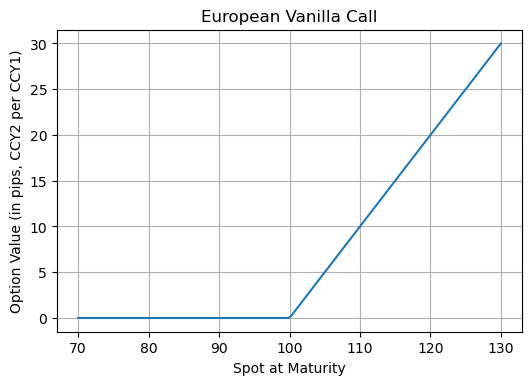

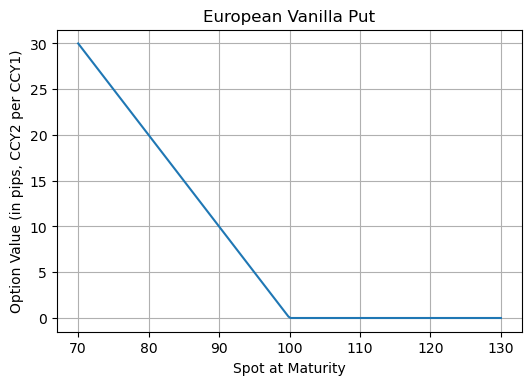

In [5]:
import matplotlib.pyplot as plt
import numpy as np

K = 100.00

S = np.linspace(70, 130, 200)

call_payoff = np.maximum(S - K, 0)
put_payoff = np.maximum(K - S, 0)

# Call payoff
plt.figure(dpi=100)
plt.plot(S, call_payoff)
plt.ylabel("Option Value (in pips, CCY2 per CCY1)")
plt.xlabel("Spot at Maturity")
plt.title("European Vanilla Call")
plt.grid()
plt.show()

# Put payoff
plt.figure(dpi=100)
plt.plot(S, put_payoff)
plt.ylabel("Option Value (in pips, CCY2 per CCY1)")
plt.xlabel("Spot at Maturity")
plt.title("European Vanilla Put")
plt.grid()
plt.show()

## 2. Vanilla Option Value vs Spot
The Garman and Kohlhagen formula to calculate FX European vanilla option prices in CCY2 per CCY1 (i.e., CCY2 pips) terms:
- $C = Se^{- rCCY1 ~T} N(d_1) - K e^{-rCCY2 ~T}N(d_2)$
- $P = K e^{-rCCY2 ~T}N(-d_2) - Se^{- rCCY1 ~T} N(-d_1) $

where:
- $d_1 = \frac{\ln(\frac{S}{K}) + (rCCY2 - rCCY1 + \frac{\sigma^2}{2})T}{\sigma \sqrt{T}}$
- $d_2 = \frac{\ln(\frac{S}{K}) + (rCCY2 - rCCY1 - \frac{\sigma^2}{2})T}{\sigma \sqrt{T}} = d_1 - \sigma \sqrt{T}$

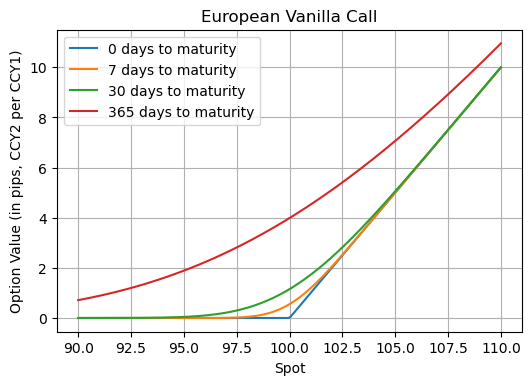

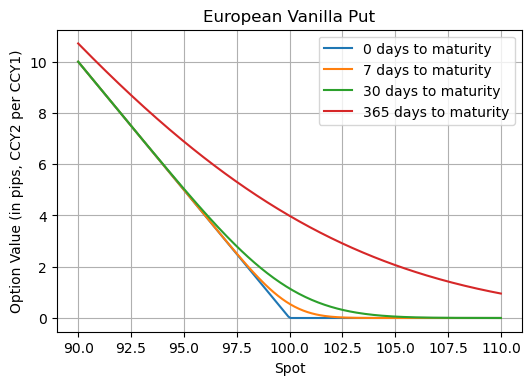

In [6]:
plt.figure(dpi=100)

t = [0.000001, 7/365, 1/12, 1] # change

rCCY1 = 0
rCCY2 = 0
sigma = 0.1 
K = 100.00
S = np.linspace(90, 110, 200)
for T in t:
    d1 = (np.log(S/K) + (rCCY2 - rCCY1 + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    call_price = S*np.exp(-rCCY1*T)*norm.cdf(d1) - K*np.exp(-rCCY2*T)*norm.cdf(d2)
    plt.plot(S, call_price, label = "{:.0f} days to maturity".format(int(T*365)))
    plt.legend()

plt.ylabel("Option Value (in pips, CCY2 per CCY1)")
plt.xlabel("Spot")
plt.title("European Vanilla Call")
plt.grid()
plt.show()

plt.figure(dpi=100)

for T in t:
    d1 = (np.log(S/K) + (rCCY2 - rCCY1 + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    put_price = K*np.exp(-rCCY2*T)*norm.cdf(-d2) - S*np.exp(-rCCY1*T)*norm.cdf(-d1) 
    plt.plot(S, put_price, label = "{:.0f} days to maturity".format(int(T*365)))
    plt.legend()

plt.ylabel("Option Value (in pips, CCY2 per CCY1)")
plt.xlabel("Spot")
plt.title("European Vanilla Put")
plt.grid()
plt.show()

## 3. Vanilla Option First-order Greeks
Greek exposures are the sensitivity of an option price to changes in market parameters. The most important first-order Greeks are **delta** and **vega**.

Delta ($\Delta$) is the change in option value for a change in spot:
- $\Delta_{call} = \frac{\partial C}{\partial S} = e^{-rCCY1 T}N(d_1)$
- $\Delta_{put} = \frac{\partial P}{\partial S} = e^{-rCCY1 T}[N(d_1) - 1]$

Vega ($\upsilon$) is the change in option value for a change in implied volatility:
- $\upsilon_{call} = \upsilon_{put} =\frac{\partial C}{\partial \sigma} = \frac{\partial P}{\partial \sigma} = Se^{-rCCY1 T}N^{\prime}(d_1)\sqrt{T}$

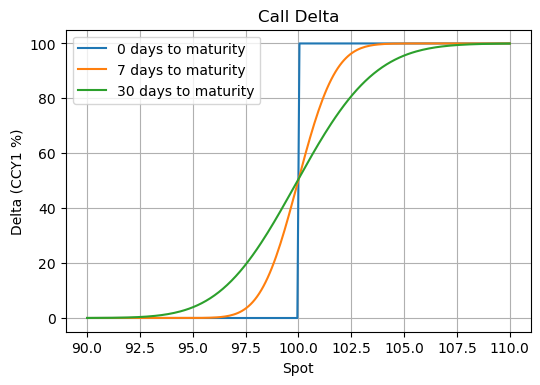

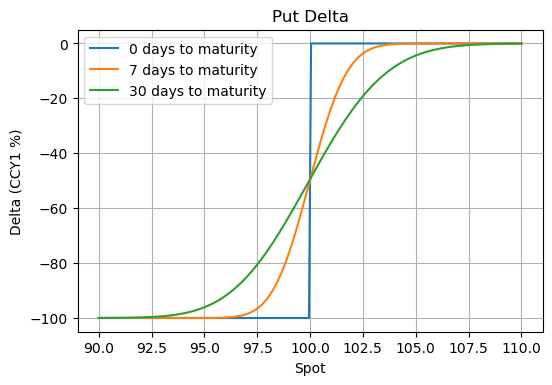

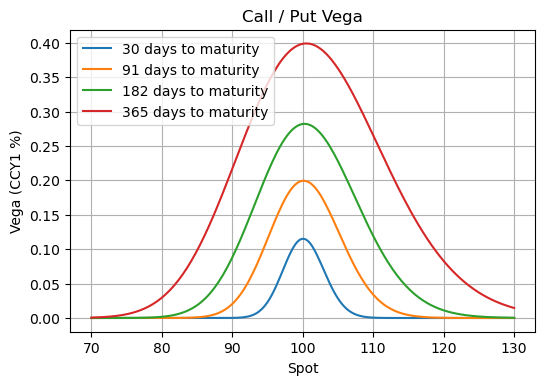

In [26]:
# Call delta
plt.figure(dpi=100)

t = [0.000001, 7/365, 1/12] # change

rCCY1 = 0
rCCY2 = 0
sigma = 0.1
K = 100.00
S = np.linspace(90, 110, 200)
for T in t:
    d1 = (np.log(S/K) + (rCCY2 - rCCY1 + sigma**2/2)*T)/(sigma*np.sqrt(T))
    call_delta = np.exp(-rCCY1*T)*norm.cdf(d1)*100
    plt.plot(S, call_delta, label = "{:.0f} days to maturity".format(int(T*365)))
    plt.legend()

plt.ylabel("Delta (CCY1 %)")
plt.xlabel("Spot")
plt.title("Call Delta")
plt.grid()
plt.show()

# Put delta
plt.figure(dpi=100)

for T in t:
    d1 = (np.log(S/K) + (rCCY2 - rCCY1 + sigma**2/2)*T)/(sigma*np.sqrt(T))
    put_delta = np.exp(-rCCY1*T)*(norm.cdf(d1) - 1)*100
    plt.plot(S, put_delta, label = "{:.0f} days to maturity".format(int(T*365)))
    plt.legend()

plt.ylabel("Delta (CCY1 %)")
plt.xlabel("Spot")
plt.title("Put Delta")
plt.grid()
plt.show()


# Call/Put Vega
plt.figure(dpi=100)

t = [1/12, 3/12, 6/12, 1] # change
S = np.linspace(70, 130, 200)
for T in t:
    d1 = (np.log(S/K) + (rCCY2 - rCCY1 + sigma**2/2)*T)/(sigma*np.sqrt(T))
    vega = S*np.exp(-rCCY1*T)*norm.pdf(d1)*np.sqrt(T)/100
    plt.plot(S, vega, label = "{:.0f} days to maturity".format(int(T*365)))
    plt.legend()

plt.ylabel("Vega (CCY1 %)")
plt.xlabel("Spot")
plt.title("Call / Put Vega")
plt.grid()
plt.show()

# 4. Vanilla FX Derivatives Structures
Within this section, vega is the primary focus. If structures are traded to shorter maturities, the most important exposure will be gamma. As observed in Chapter 6, for vanilla options, gamma profiles and vega profiles have similar shapes but they evolve differently over time.

- **Straddle**: two vanilla options with identical contract details except that one is a call the other is a put. A single two-way volatility quote is made and, if dealt, that volatility is used to determine the premiums on both legs.
- **Strangle**: Like a straddle except that the call and put have different strikes. Both strikes are placed OTM and so the call strike is always higher than the put strike. When making a price on a strangle, a single two-way volatility is quoted. If dealt, that volatility is used to determine the premiums on both legs.
- **Butterfly (Fly)**: a combination of a straddle and a strangle. The broker fly contract is the most commonly traded butterfly contract. A broker fly has equal notional strangle strikes and the notional on the ATM straddle is chosen such that the package is initially vega-neutral. In the interbank market, prices on broker fly contracts are quoted as the volatility differential between the strangle strikes and the ATM strikes.
    - Long Butterfly = Long Strangle + Short Straddle
    - Short Butterfly = Short Strangle + Long Straddle
- **Risk reversal (RR)**: contains two vanilla options with the same currency pair, notional, expiry, and cut. However, the two legs have different strikes, one is a call and the other is a put, plus one is bought while the other is sold (a spread contract). There are offsetting gamma and vega exposures between the legsRisk reversals are usually quoted to a specific delta.
    - Long RR = Long Call($K_1$) - Short Put($K_2$)
    - Short RR = Short Call($K_1$) - Long Put($K_2$)

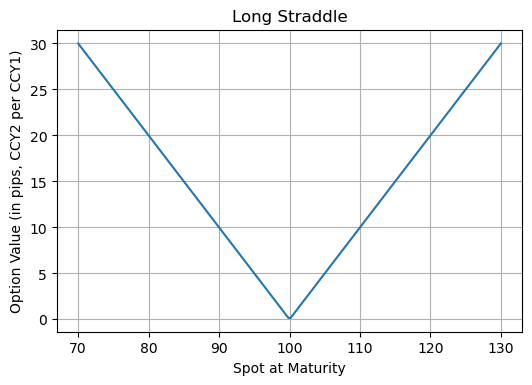

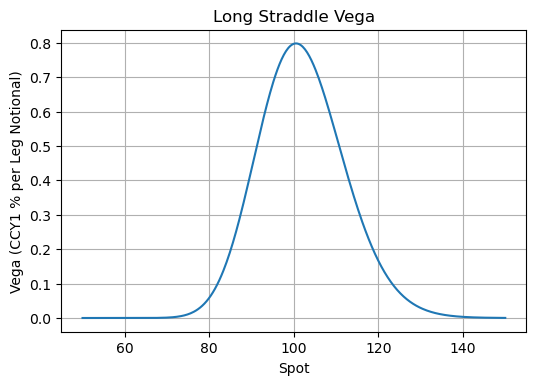

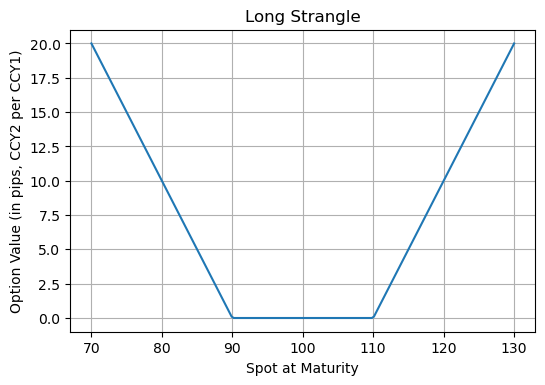

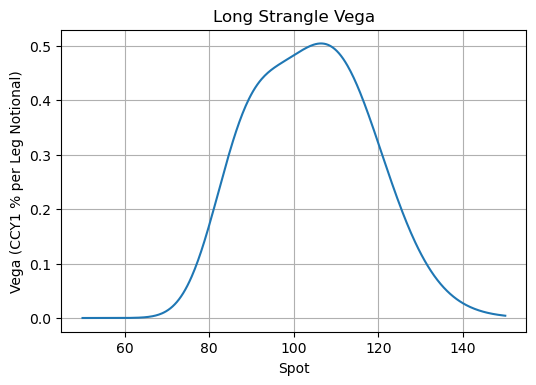

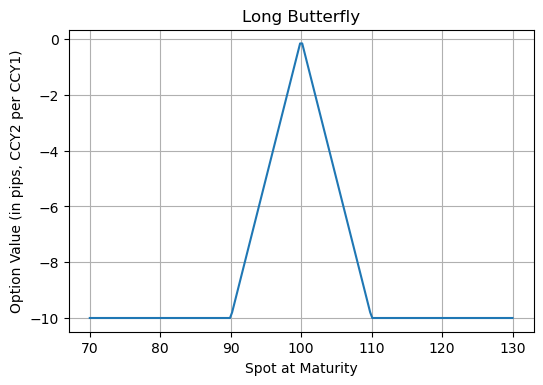

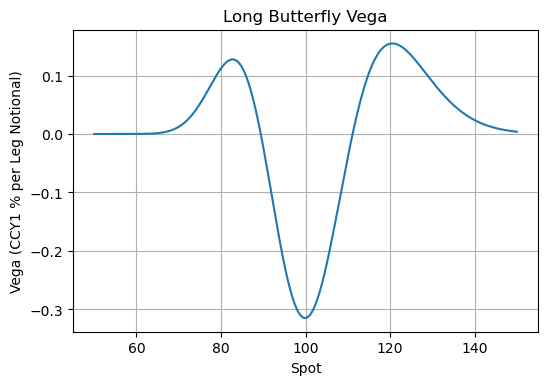

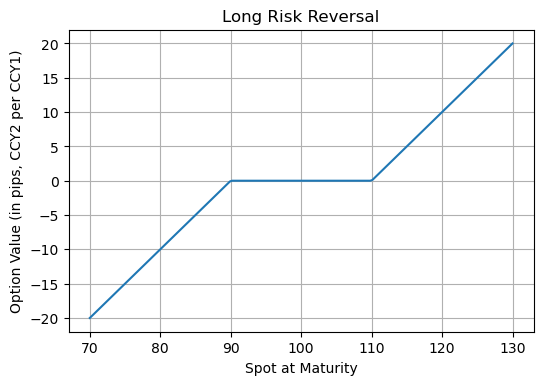

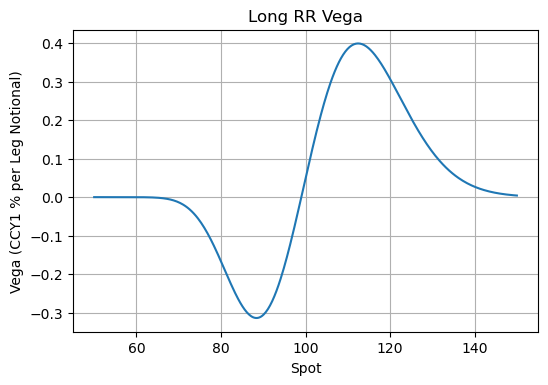

In [7]:
import matplotlib.pyplot as plt
import numpy as np

K = 100.00

# Long straddle payoff
S = np.linspace(70, 130, 200)
call_payoff = np.maximum(S - K, 0)
put_payoff = np.maximum(K - S, 0)
straddle = call_payoff + put_payoff 
plt.figure(dpi=100)
plt.plot(S, straddle)
plt.ylabel("Option Value (in pips, CCY2 per CCY1)")
plt.xlabel("Spot at Maturity")
plt.title("Long Straddle")
plt.grid()
plt.show()

# Straddle Vega
plt.figure(dpi=100)
S = np.linspace(50, 150, 400)
d1 = (np.log(S/K) + (rCCY2 - rCCY1 + sigma**2/2)*T)/(sigma*np.sqrt(T))
call_vega = S*np.exp(-rCCY1*T)*norm.pdf(d1)*np.sqrt(T)/100
put_vega = S*np.exp(-rCCY1*T)*norm.pdf(d1)*np.sqrt(T)/100
straddle_vega = call_vega + put_vega
plt.plot(S, straddle_vega)
plt.ylabel("Vega (CCY1 % per Leg Notional)")
plt.xlabel("Spot")
plt.title("Long Straddle Vega")
plt.grid()
plt.show()






# Long strangle payoff
S = np.linspace(70, 130, 200)
call_payoff = np.maximum(S - (K+10), 0) 
put_payoff = np.maximum((K-10) - S, 0)
strangle = call_payoff + put_payoff
plt.figure(dpi=100)
plt.plot(S, strangle)
plt.ylabel("Option Value (in pips, CCY2 per CCY1)")
plt.xlabel("Spot at Maturity")
plt.title("Long Strangle")
plt.grid()
plt.show()


# Strangle Vega
plt.figure(dpi=100)
S = np.linspace(50, 150, 400)
d1 = (np.log(S/(K+10)) + (rCCY2 - rCCY1 + sigma**2/2)*T)/(sigma*np.sqrt(T))
call_vega = S*np.exp(-rCCY1*T)*norm.pdf(d1)*np.sqrt(T)/100
d1 = (np.log(S/(K-10)) + (rCCY2 - rCCY1 + sigma**2/2)*T)/(sigma*np.sqrt(T))
put_vega = S*np.exp(-rCCY1*T)*norm.pdf(d1)*np.sqrt(T)/100
strangle_vega = call_vega + put_vega
plt.plot(S, strangle_vega)
plt.ylabel("Vega (CCY1 % per Leg Notional)")
plt.xlabel("Spot")
plt.title("Long Strangle Vega")
plt.grid()
plt.show()






# Long butterfly payoff
S = np.linspace(70, 130, 200)
butterfly = strangle - straddle
plt.figure(dpi=100)
plt.plot(S, butterfly)
plt.ylabel("Option Value (in pips, CCY2 per CCY1)")
plt.xlabel("Spot at Maturity")
plt.title("Long Butterfly")
plt.grid()
plt.show()


# Long Butterfly Vega
plt.figure(dpi=100)
S = np.linspace(50, 150, 400)
butterfly_vega = strangle_vega - straddle_vega
plt.plot(S, butterfly_vega)
plt.ylabel("Vega (CCY1 % per Leg Notional)")
plt.xlabel("Spot")
plt.title("Long Butterfly Vega")
plt.grid()
plt.show()






# Long RR payoff
S = np.linspace(70, 130, 200)
call_payoff = np.maximum(S - (K+10), 0) 
put_payoff = np.maximum((K-10) - S, 0)
RR = call_payoff - put_payoff
plt.figure(dpi=100)
plt.plot(S, RR)
plt.ylabel("Option Value (in pips, CCY2 per CCY1)")
plt.xlabel("Spot at Maturity")
plt.title("Long Risk Reversal")
plt.grid()
plt.show()


# Long RR Vega
plt.figure(dpi=100)
S = np.linspace(50, 150, 400)
d1 = (np.log(S/(K+10)) + (rCCY2 - rCCY1 + sigma**2/2)*T)/(sigma*np.sqrt(T))
call_vega = S*np.exp(-rCCY1*T)*norm.pdf(d1)*np.sqrt(T)/100
d1 = (np.log(S/(K-10)) + (rCCY2 - rCCY1 + sigma**2/2)*T)/(sigma*np.sqrt(T))
put_vega = S*np.exp(-rCCY1*T)*norm.pdf(d1)*np.sqrt(T)/100
RR_vega = call_vega - put_vega
plt.plot(S, RR_vega)
plt.ylabel("Vega (CCY1 % per Leg Notional)")
plt.xlabel("Spot")
plt.title("Long RR Vega")
plt.grid()
plt.show()
###

### Market Tenor Calculations
Within the FX derivatives market, four dates (can only ever be weekdays) are defined. 
1. **Horizon**: the date on which the trade originates (today)
2. **Spot date**: the date on which the initial transfer of funds (the premium) often takes place and the date on which any spot hedge settles.
3. **Expiry date**: the date on which the contract expires and any final transfer of funds is known.
4. **Delivery date**: the date on which the final transfer of funds generated from the contract usually takes place and the date on which forward hedges usually settle.

<figure>
    <img src="images/timeline_market_tenor.png" width="500"/>
</figure>

**Calculating spot dates**

The spot date is calculated from the horizon ($T$). There are two possible cases: 
1. If a currency pair has $T+1$ settlement (e.g. USD/CAD), the spot date is one day after the horizon. In this case, $T+1$ must be a business day and also not a U.S. holiday.
2. If a currency pair has $T+2$ settlement, the spot date is two days after the horizon.

In addition, for most currencies, no money can clear (settle) on U.S. holidays, meaning that the spot date cannot occur on a U.S. holiday even if USD is not a currency within the currency pair.


**Calculating Expiry and Delivery Dates**

Market tenors for FX options contracts are quoted either as 'overnight' or in terms of a number of days, weeks, month, or years. In general, the expiry date can be any weekday even if it's a holiday in one of both of the currencies, except 1st January.
- **Overnight**: For overnight trades, the expiry dates is the next weekday after the horizon. The delivery date is then calculated from the expiry date in the same way as the spot date is calculated from the horizon.
- **Days and Weeks**: For a trade with a V days tenor, the expiry date is the day V calendar days after the horizon (unless this expiry date is a weekend or 1st January). For a trade with an X weeks tenor, the expiry date is 7X calendar days after the horizon. The delivery date is then calculated from the expiry date in the same way as the spot date is calculated from the horizon.
- **Months & Years**: For a trade with a Y months (years) tenor, the expiry date is found by first calculating the spot date, then moving forward Y months (years) from the spot date to the delivery date.

**Special Cases**

There are two special cases involving trades that take place around the end of the month and have a tenor defined in month or year multiples. Defining the *target month* to lie $x$ months forward from the spot date month if the tenor is $x$ months. For example, if the spot date month is February and the tenor is 3M, the target month is May.
1. If the spot date falls on the last business day of the month in the currency pair, then the delivery date is defined by convention to be the last business day of the target month. For example, assuming all days are business days: If the spot date is 30th April, a one-month time to expiry will make the delivery date 31st May. The is described as trading "end-end".
2. If the spot date falls before the end of the month but the resultant delivery date is beyond the end of the target month. For example, assuming all days are business days: If the spot date is 30th January, a 1 month time to expiry implies a delivery date of February 30; however, this does not exist and the expiry date becomes February 28 (in a non-leap year, obviously). 

Also, expiry date and delivery date calculations sometimes adjust in different time zones. For example, when trading USD/JPY for Tokyo cut in Asia time, the expiry date may be adjusted to avoid JPY holidays, but onces London comes in and starts trading USD/JPY for NY cut, the expiry date will change. Therefore, expiry dates for market tenors can change not only from day to day but within the trading day.

## PRACTICAL: Generating Tenor Dates
To build a volatility surface or quote prices based on market tenors, the expiry dates corresponding to each tenor must be calculated. We need functions to:
- increment a date to the next business day
- decrement a date to the previous business day
- calculate the spot date from a horizon date
- calculate the horizon date from a spot date

Market tenors can be specified in terms of a number of weeks (e.g., "2W"), months (e.g. "6M") or years (e.g., "5Y"), or the overnight tenor (e.g., "ON"). The getExpiryFromTenor function must contain different logic for these different cases using the rules outlined above. We ignore the special cases for now. 

In [2]:
from datetime import timedelta
from datetime import datetime
from dateutil.relativedelta import relativedelta
import pandas as pd
import numpy as np

def nextBusinessDay(date):
    """Returns the next business day.
        
    Parameters
    ----------
    date : dateobject
    
    """
    date += timedelta(days = 1)
    if bool(len(pd.bdate_range(date, date))): 
        return date
    else:
        return nextBusinessDay(date)
    
def previousBusinessDay(date):
    """Returns the previous business day.
        
    Parameters
    ----------
    date : dateobject
    
    """
    date -= timedelta(days = 1)
    if bool(len(pd.bdate_range(date, date))): 
        return date
    else:
        return previousBusinessDay(date)
    
def getSpotFromHorizon(horizon_date):
    """Returns spot date from a horizon date 
    (assuming T+2, i.e. two business days after the horizon)
        
    Parameters
    ----------
    horizon_date : dateobject
    
    """
    return nextBusinessDay(nextBusinessDay(horizon_date))

def getHorizonFromSpot(spot_date):
    """Returns horizon date from a spot date 
    (assuming T+2, i.e. two business days before the spot)
        
    Parameters
    ----------
    spot_date : dateobject
    
    """
    return previousBusinessDay(previousBusinessDay(spot_date))

def getExpiryFromTenor(horizon_date, tenor):
    """Returns market tenor date from a horizon date given market tenor
        
    Parameters
    ----------
    horizon_date : dateobject
    
    tenor: str
    e.g., "ON", "2W", "6M", "5Y"
    """
    
    if tenor == "ON": 
        return nextBusinessDay(horizon_date)
    elif tenor[-1] == "W": 
        return horizon_date + timedelta(days = int(tenor[:-1]) * 7)
    elif tenor[-1] == "M": 
        # first calculate the spot date
        spot_date = getSpotFromHorizon(horizon_date)
        # then calculate delivery date
        delivery_date = spot_date + relativedelta(months= + int(tenor[:-1]))
        # calculate expiry date the same way the horizon date is calculated 
        # from the spot date
        return getHorizonFromSpot(delivery_date)
    elif tenor[-1] == "Y":
        spot_date = getSpotFromHorizon(horizon_date)
        delivery_date = spot_date + relativedelta(years= + int(tenor[:-1]))
        return getHorizonFromSpot(delivery_date)
    else:
        raise InputError("Invalid input, must be in the form: 'ON', '5W', '7M' or '1Y' ")
        
def populateExpiryDates(horizon_date):
    """Returns market tenor dates as a dataframe of standard market tenor given 
    horizon date
        
    Parameters
    ----------
    horizon_date : dateobject
    
    """
    std_tenor = ["ON", "1W", "2W", "1M", "2M", "3M", "6M", "1Y", "2Y"]
    expiry_dates = []
    for tenor in std_tenor:
        expiry_dates.append(getExpiryFromTenor(horizon_date, tenor).strftime("%a %d-%b-%Y"))
        
    df = pd.DataFrame(index=range(len(std_tenor)), columns = ["Horizon", "Tenor", "Expiry Date"])
    df["Horizon"].iloc[0] = horizon_date.strftime("%a %d-%b-%Y")
    df["Tenor"] = std_tenor
    df["Expiry Date"] = expiry_dates
    df = df.replace(np.nan, '', regex=True)
    return df

# getExpiryFromTenor(datetime.strptime('11-06-2021', '%d-%m-%Y'), "2Y").strftime("%a %d-%b-%Y")

In [68]:
previousBusinessDay(datetime.strptime('18-04-2022', '%d-%m-%Y'))

datetime.datetime(2022, 4, 15, 0, 0)

In [21]:
date = datetime.strptime('02-01-2021', '%d-%m-%Y')
len(pd.bdate_range(date, date))

0

In [22]:
datetime.strptime('02-01-2021', '%d-%m-%Y').weekday()

5

In [3]:
populateExpiryDates(datetime.strptime('11-08-2021', '%d-%m-%Y'))

,Horizon,Tenor,Expiry Date
0,Wed 11-Aug-2021,ON,Thu 12-Aug-2021
1,,1W,Wed 18-Aug-2021
2,,2W,Wed 25-Aug-2021
3,,1M,Thu 09-Sep-2021
4,,2M,Mon 11-Oct-2021
5,,3M,Thu 11-Nov-2021
6,,6M,Thu 10-Feb-2022
7,,1Y,Thu 11-Aug-2022
8,,2Y,Thu 10-Aug-2023


## 5. ATM Curve Construction
ATM curves can be constructed in two steps. 
1. A core ATM curve is established
1. Additional parameters are introduced so the correct ATM implied volatility is generated for all possible expiry dates.

### Variance
Variance is the key measure for building ATM curves:
$$\text{variance} = \sigma^2 T $$
where $\sigma$ is the ATM implied volatility to time $T$ (measured in years).

Variance can be thought of as a measure of cumulative spot movement. It has two powerful properties: 
1. Variance over any time period must be nonnegative.
2. Variance is additive (i.e. variance over two days = variance on first day + variance on second day)

Variance can be used to calculate the forward ATM implied volatility between two dates in the future. Given ATM implied volatility $\sigma_1$ to time $T_1$, ATM implied volatility $\sigma_2$ to time $T_2$, and $T_1 < T_2$:
- Variance(from horizon to $T_1$) = $\sigma_1^2 T_1$
- Variance(from horizon to $T_2$) = $\sigma_2^2 T_2$
- Variance(from $T_1$ to $T_2$) = $\sigma_2^2 T_2 - \sigma_1^2 T_1$

Therefore, the forward ATM implied volatility between $T_1$ and $T_2$: 
\begin{split}
\sigma_{1,2} &= \sqrt{\frac{\text{Variance}(\text{from} ~T_1~ \text{to}~ T_2)}{T_2 - T_1}} \\
&= \sqrt{\frac{\sigma_2^2 T_2 - \sigma_1^2 T_1}{T_2 - T_1}} 
\end{split}

### Core ATM construction
There are two main approaches that can be used to generate core ATM curves:
1. *Input* the ATM curve at the market tenors and interpolate to get ATM volatility for expiry dates between the market tenors.
2. Use a *model* to generate the ATM curve and *output* the ATM volatility at the market tenors. 

Recall that the standard market tenors up to two years are: O/N (overnight), 1wk, 2wk, 1mth, 2mth, 3mth, 6mth, 1yr and 2yr.

#### 1. Using interpolation to construct a core ATM curve
**Linear volatility interpolation**: 
Given ATM implied volatility at the standard market tenors, the core ATM curves can be constructed using linear (volatility) interpolation between market tenors. 
To further investigate the interpolation, variance at each expiry date is calculated and plotted. The variance profile should be rising over time (almost linearly). If there is a decrease (even a small one) in the variance profile, this method has failed: Variance must be nonnegative. Therefore, we can conclude linear volatility interpolation has failed to build a valid ATM curve form valid inputs.

**Linear variance interpolation**: Given ATM implied volatility at the standard market tenors, variance at each market tenor can be calculated. Then, interpolate linearly to obtain variance between market tenors. The variance profile has no negative daily variance and the ATM implied volatility may not be monotonically increasing over time.

In some cases, the linear variance methodology generates an ATM implied volatility profile that rises sharply initially and then flattens off. If we consider its daily variance profile, it does not look realistic: daily variance jump immediately past each market tenor date. This does not make intuitive sense. Ideally, the core daily variance function should be smooth. 

**Comparing these two methods**:
- *Linear volatility interpolation* often produces intuitively correct ATM curves but does not ensure positive forward variance.
- *Linear variance interpolation* produces ATM curves that ensure positive forward variance (given valid inputs) but does not always create intuitively correct ATM curves.

In practice, trading desks use a combination of these approaches to produce intuitive curves with no negative forward variance. ATM curves are generally constructed in variance terms but more sophisticated schemes are used to control how daily variance evolves over time.

#### 2. Using a model to construct a core ATM curve
Many different models are possible but fundamentally the functional form most often involves a short-term factor (could be volatility, variance, or daily variance), a long-term factor, and a speed of moving from short to long. Here is one possible simple approach (that would never be used in practice because it could generate arbitragable ATM curves):
$$\sigma_t = \sigma_{short} + (\sigma_{long} - \sigma_{short})(1 - e^{-\lambda T})$$

where $\sigma_{long}$ and $\sigma_{short}$ are short-term and long-term ATM volatilities respectively, $\lambda$ is speed, and T is time to expiry in years. The $(1 - e^{-\lambda T})$ term moves between 0 and 1. Higher $\lambda$ causes the function to move from 0 to 1 more quickly.

Given $\sigma_{long}$ and $\sigma_{short}$, we can calculate ATM implied volatilities across different market tenors. The ATM curve is now an output from the model rather than being an input. This approach requires the model parameters to be calibrated to market ATM implied volatilities and the process can be time consuming.

Once the core ATM curve has been constructed, additional parameters or weights are introduced in order to give traders sufficient control over the curve. This control is required because different expiry dates (or even different times within expiry dates) have different expected spot volatility and this information must be incorporated into the ATM curve. This additional control is mainly important at shorter expiry dates.

Example 1: 1wk (7-day) ATM implied volatility is 12.0%. A 1wk option always contains five weekdays and two weekend days where spot does not move because the market is closed (i.e., zero variance). Assume spot is equally volatile on each weekday (i.e., equal daily variance). What is the 8-day ATM implied volatility?
$$\sigma_{8-day ATM} = \sqrt{\frac{\text{variance}_{\text{1wk}} \times \frac{6}{5}}{\frac{8}{365}}} = 12.3 \%$$

We can get the lower bound on the 8-day ATM implied volatility by assuming the spot to be completely static: 
$$\sigma_{8-day ATM} = \sqrt{\frac{\text{variance}_{\text{1wk}} }{\frac{8}{365}}} = 11.25 \%$$
If the 7-day ATM volatility is 12.0%, the 8-day ATM volatility must be at least 11.25%.


### Implied Volatility Patterns Over the Week
The number of market-open and market-closed days to a specific expiry date has an important impact on the ATM implied volatility. Consider O/N ATM volatility compared to the 1wk ATM volatility. Assume each market-open day is equally volatile (i.e. equal daily variance) and zero variance over the weekend:
\begin{split}
\text{variance}_{\text{1wk}} &= \text{variance}_{\text{O/N}} \times 5\\
\sigma_{\text{1wk}}^2 \times \frac{7}{365} &=  \sigma_{\text{O/N}}^2 \times \frac{1}{365} \times 5 \\
\sigma_{\text{1wk}} &= \sigma_{\text{O/N}} \times \sqrt{\frac{5}{7}} \\
\sigma_{\text{1wk}} &< \sigma_{\text{O/N}}
\end{split}
The O/N ATM implied volatility is higher than the 1wk ATM implied volatility because the 1wk expiry date contains two weekdays. This is commonly observed in the FX derivatives market.

The market-open-to-total-days ratio also explains why ATM implied volatility tends to rise for future expiry dates over the working week. For a fixed horizon, a future Monday expiry will almost always have a lower implied volatility than the Friday following it because the Friday has a higher market-open-to-total-days ratio. Essentially: higher market-open-to-total-days ratio $\Rightarrow$ higher ATM implied volatility.


### FX Derivatives Market Pricing
Within the FX derivatives market, when using the Black-Scholes formula for pricing, time to expiry ($T$) is specified in **discrete daily steps**. This is a key feature of the FX derivatives market.

Consider a situation where the current time is 9 a.m. London time on Monday and overnight NY cut ATM implied volatility is $15.0\%$. The overnight expires tomorrow, so $T = \frac{1}{365}$ and:
$$\text{variance}_{\text{O/N}} = 0.15^2 \times \frac{1}{365} = 6.1644 \times 10^{-5}$$

This variance can now be split into even smaller time intervals. NY cut is at 10 a.m. New York time, which is (usually) 3 p.m. London time, so this overnight option actually expires in 30 hours. Assuming spot is equally volatile between now and NY cut tomorrow:
$$\text{variance}_{\text{hourly}} = \frac{6.1644 \times 10^{-5}}{30}$$

After one hour passes, the remaining variance on the option is:
$$29 \times \text{variance}_{\text{hourly}} = 5.9578 \times 10^{-6}$$

which implies a new overnight ATM volatility of:
$$\sigma_{\text{O/N ATM}} = \sqrt{\frac{5.9578 \times 10^{-6}}{\frac{1}{365}}} = 14.75\%$$

Note that $T$ is unchanged within this calculation due to being specified in **discrete daily steps**. At the start of each trading day, when the overnight option expiry moves forward one trading day, the ATM implied volatility jumps higher due to increased variance. Then over the course of the trading day, the ATM implied volatility gradually moves lower due to reducing variance. Variance (and hence premium) to a fixed expiry date reduces as time passes but because the market uses constant daily $T$ values within the Black-Scholes formula for pricing, implied volatility reduces instead. This effect occurs at all tenors but the impact is only visible in short-dated options, particularly the overnight.

It is interesting to consider that if the market used a more accurate $T$ for pricing, short-dated implied volatility would be more stable throughout the day. However, since spot volatility is not constant throughout the day, implied volatility would not be completely static. Therefore, introducing more accuracy into $T$ adds to the complexity of the market for only minimal benefit.

In practice, short-dated implied volatility does tend to drift lower over the course of the day, but spot behavior is also important. If there is a large spot move or spot breaks out of its recent range, implied volatility generally moves higher due to an expectation of increased future spot volatility. Traders with short gamma positions come into the market to hedge their positions and the market implied volatility increases. Alternatively, if spot is static, implied volatility often falls more quickly than its “natural rate” as traders come into the market to reduce long gamma positions where they are struggling to trade their deltas.

If traders believe short-dated implied volatility is falling slower than it should over the course of the day, gamma can be “rented.” This involves, for example, buying the overnight ATM at the start of the trading day and then selling the same contract back at the end of the trading day. This technique is only applicable in liquid currency pairs where there is good two-way flow in short-dated vanilla options; otherwise the spread cross involved in the two transactions will kill any value in the trade.

Risk management of FX derivatives positions is also usually performed assuming discrete daily time steps. This is the reason that options expiring on the horizon date generate delta jumps through their strike level. It is also the reason that trading positions show all options expiring on the horizon date at their own expiry times. If the trading position has options expiring at different cuts on the expiry date, this is inconsistent, but it keeps the trading risk stable. Traders adjust for this effect within their risk management.

### Overnight (O/N) ATM on A Friday
On Friday, the “overnight” option expires on a Monday; three days later rather than one. Therefore, in a market Black-Scholes pricing world, $T = \frac{3}{365}$.

Vega($\upsilon$) is a function of $\sqrt{T}$:
$$\upsilon_{call} = \upsilon_{put} = \frac{\partial P}{\partial \sigma} = S e^{-rCCY1 T} N^{\prime}(d_1) \sqrt{T} $$

Therefore (ignoring discounting):
$$\upsilon_{1-day, ~\text{ATM}} \sqrt{3} = \upsilon_{3-day, ~\text{ATM}}$$

Volga ($\frac{\partial \upsilon}{\partial \sigma}$) is zero on ATM options, so for a given tenor, roughly:
$$C_{\text{ATM}} = P_{\text{ATM}} = \upsilon \times \sigma_{\text{ATM}}$$

Assuming there is no variance over the weekend and each weekday is equally volatile, the O/N ATM contract will have the same premium each day and therefore:
$$\sigma_{3-day,~\text{ATM}} = \frac{\sigma_{1-day,~\text{ATM}}}{\sqrt{3}}$$

In practice this means that the market overnight ATM implied volatility quoted on a Friday cannot be directly compared with the overnight ATM implied volatility quoted on other days. To get the Friday overnight ATM into the same terms it must be multiplied by $\sqrt{3}$. 

In practice, the market pricing of the overnight ATM contract on a Friday is closely related to the market's weekend decay position. The jump from Friday end-of-day to Monday morning covers three days. If this is not correctly adjusted for within risk management systems, theta from Friday to Monday will be artificially large. In a simplified world with no adjustment for this effect, a position that is long the same amount of gamma each day will, on average:
- Make money on Tuesday through to Friday as only $(5/7) = 71\%$ of the correct theta is paid per day.
- Lose all additional profit the following Monday as $(5/7) \times 3 = 213\% $ of correct theta is paid from Friday into Monday.

Amazingly, in a sophisticated financial market in the twenty-first century, this effect still produces trading opportunities as short-dated options can become too cheap on Friday as some banks oversell to reduce their weekend theta.

### New York Cut vs Tokyo Cut Pricing
In G10 currency pairs the two most common expiry cuts are New York (NY) and Tokyo (TOK). The New York cut versus Tokyo cut ATM volatility differential can be analysed using the same variance framework:
- TOK cut: 3 p.m. Tokyo time (often 6 a.m. GMT)
- NY cut: 10 a.m. New York time (often 3 p.m. GMT)

That is, NY cut options contain an extra nine hours of optionality.

Therefore, the Tokyo cut ATM implied volatility is always lower ("trades at a discount") than the New York cut ATM implied volatility because both are priced using the same discrete daily $T$ but the Tokyo cut occurs first in the day and therefore has less variance and a lower premium.

Assuming spot is always equally volatile:

\begin{split}
\frac{\text{variance}_{\text{TOK}}}{T_{\text{TOK}}} &= \frac{\text{variance}_{\text{NY}}}{T_{\text{NY}}}\\
\frac{\sigma_{\text{TOK}}^2 T_{\text{market}}}{T_{\text{TOK}}} &= \frac{\sigma_{\text{NY}}^2 T_{\text{market}}}{T_{\text{NY}}} \\
\sigma_{\text{TOK}} &= \sigma_{\text{NY}}\sqrt{\frac{T_\text{TOK}}{T_\text{NY}}}
\end{split}
where $T_{\text{market}}$ is the time to expiry measured in years used within the market Black-Scholes pricing framework, $T_{\text{TOK}}$ is the real time to expiry to the Tokyo cut and $T_{\text{NY}}$ is the real time to expiry to the New York cut.

Therefore,the New York cut versus Tokyo cut volatility differential increases over the course of a given trading day. 

At 9 a.m. GMT:
- O/N TOK cut = 6 a.m. GMT the next day = 21 hours
- O/N NY cut = 3 p.m. GMT the next day = 30 hours
$$\sigma_{\text{TOK}} = \sigma_{\text{NY}} \times \sqrt{\frac{21}{30}} = \sigma_{\text{NY}} \times 0.84$$

At 5 p.m. GMT:
- O/N TOK cut = 6 a.m. GMT the next day = 13 hours
- O/N NY cut = 3 p.m. GMT the next day = 22 hours
$$\sigma_{\text{TOK}} = \sigma_{\text{NY}} \times \sqrt{\frac{13}{22}} = \sigma_{\text{NY}} \times 0.77$$

For maturities past three months, New York and Tokyo cuts will generally be priced at the same implied volatility (assuming no events, etc. on the expiry date). For example, at the three-month tenor, approximately:
$$\sigma_{\text{TOK}} = \sigma_{\text{NY}} \times \sqrt{\frac{2151 hours}{2160 hours}} = \sigma_{\text{NY}} \times 0.998$$

### Intraday Variance Patterns
The simplifying assumption that spot is equally volatile throughout the trading day is obviously not correct in practice. In liquid G10 currency pairs, realised variance follows a fairly well-established pattern shown below in which it:
- Starts low and builds up during Asia trading time
- Peaks around GMT 08:00 as Europe/London come in
- Dips during Europe/London lunch around GMT 11:00
- Picks up again in the afternoon with New York in and reaches a day highs around GMT 14:00
- Decreases after GMT 15:00 (NY cut) to the end of the day in the New York afternoon
<figure>
    <img src="images/intraday_hourly_vol.png" width="500"/>
    <figcaption>Fig.1 - Stylized intraday hourly realized variance.</figcaption>
</figure>

The intraday variance patterns are different in emerging market currency pairs where trading is concentrated in one region or the spot market opening hours are restricted. Such variance patterns should be taken into account within the option pricing framework for maximum accuracy when pricing options expire at different cut times.


### Events and Holidays
Events (economic data releases, election results, etc.) cause spot to move as the market adjusts to new information. Event days are therefore assigned higher variance within the ATM curve, specifically in the period immediately after the data is released. This in turn increases the ATM implied volatility for options expiring on that expiry date (if the cut occurs after the event has been released) and also expiry dates following it. The exact date and time of events is known beforehand and therefore the market ATM curve incorporates this information.

On days containing important data releases, realized spot variance is usually similar or slightly lower than the spot variance on a "normal day" until the data release. Over the data release, realized spot variance increases sharply and then reverts back to the normal day as shown below. On this expiry date, the NY cut contains the additional expected spot variance from the event but the TOK cut does not. This leads to a far larger NY cut versus TOK cut ATM implied volatility differential than usual.
<figure>
    <img src="images/intraday_hourly_vol_NFP.png" width="500"/>
    <figcaption>Fig.2 - Stylized intraday hourly realized variance on Non-Farm Payroll day.</figcaption>
</figure>

The presence of an event also causes short-dated implied volatility to decay differently over the course of the day. Prior to the event, short-dated ATM implied volatility will move lower only slightly but after the event has occurred ATM implied volatility can drop sharply as expected future spot variance reduces. 

Events usually occur in a particular currency. For example, European employment data primarily impacts spot in currency pairs that include EUR. However, for the most important events, crosses can also exhibit increased volatility if the majors move in an asynchronous manner. For example; Non-Farm Payrolls impacts USD, but if EUR/USD and AUD/USD are both more volatile but they do not move in a perfectly synchronized manner, EUR/AUD realized volatility also increases.

Public holidays also impact realized volatility and variance. There is often significantly less spot activity in pairs containing the holiday currency simply because there are fewer market participants operating that day. In addition, U.K. and U.S. public holidays are important enough to reduce spot activity across all currency pairs. Therefore, public holiday days in a particular currency have lower variance within the ATM curve.

### Weekday Variance Patterns
The FX spot market often exhibits increased realised variance later in the working week, as shown below. This effect occurs partially because there tend to be more data releases later in the week. However, even with the effect of events removed, Mondays are often less volatile than other weekdays.
<figure>
    <img src="images/avg_daily_spot_var.png" width="500"/>
    <figcaption>Fig.3 - Averge daily spot variance for G10 pairs in 2012.</figcaption>
</figure>

Like the NY cut versus TOK cut implied volatility differential, the day of the week of a particular expiry date matters more at shorter tenors than at longer tenors. The market often has a preference to buy the next few Friday expiries and sell the next few Monday expiries but the weekday of, for example, the 6mth ATM contract is not a major concern.


### Pricing Same-Day Options
Pricing options that expire later today is impossible within the standard market Black-Scholes pricing framework. The number of days is zero; hence $T$ is zero and therefore same-day options cannot be quoted in volatility terms. Recall that the Black-Scholes option pricing formula: $d_1$ would break because the denominator is zero.

So-called same-day options must therefore be quoted in *premium* terms. One way to calculate the premium of a same-day option is to start with an overnight option and use the variance framework to adjust the implied volatility. 

Example:  At 9 a.m. GMT, a client requests a price in a same-day NY cut option.
<figure>
    <img src="images/same_day_vanilla.png" width="500"/>
    <figcaption>Fig.4 - Pricing a same-day vanilla option.</figcaption>
</figure>

The O/N NY ATM implied volatility is $12\%$. Therefore:
$$\text{variance}_{\text{O/N ~ NY Cut}} = 0.12^2 \times \frac{1}{365} = 3.945 \times 10^{-5}$$

Assuming each hour has equal variance:
$$\text{variance}_{\text{Same-Day ~ NY Cut}} = \frac{6}{30} \times 3.945 \times 10^{-5} = 7.89 \times 10^{-6}$$

Therefore, the equivalent one day ATM volatility is:
$$\sigma_{\text{1 day ATM}} = \sqrt{\frac{7.89 \times 10^{-6}}{\frac{1}{365}}} = 5.3 \%$$

This implied volatility can then be used to price an overnight option which gives the same-day option premium. Note that interest rates should be set to zero within the same-day pricing since forward drift and discounting will have no impact.

In general, same-day options are nonstandard and a wider bid–offer spread should be charged. Plus it is vital to take expected intraday variance profiles and events into account. Be suspicious: Why wouldn't the counterparty be happy to wait until the standard option expiry time?


## PRACTICAL: Constructing an ATM Curve 
Three methods for constructing an ATM curve are developed in this section. 
1. An ATM curve is constructed using interpolation between market tenors.
2. An ATM curve is constructed using a parameterized model. 
3. Weights are added to simple ATM curve to demonstrate how ATM curves are maintained in practice.

### Task A: Constructing an ATM Curve Using Interpolation
When constructing an ATM curve based on market tenors, the expiry date for each market tenor must first be calculated. The ATM implied volatility is then manually inputted at each tenor. For the purposes of testing, a simple upward-sloping ATM curve can be used initially:

In [29]:
import pandas as pd
import plotly
import plotly.offline as pyo
import numpy as np
import matplotlib.pyplot as plt
import time
import random
import numpy as np
from scipy import stats
from datetime import datetime
import matplotlib.dates as mdates
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [30]:
class Error(Exception):
    """Base class for exceptions in this module."""
    pass


class InputError(Error):
    """Exception raised for errors in the input.

    Attributes:
        expression -- input expression in which the error occurred
        message -- explanation of the error
    """

    def __init__(self, expression, message):
        self.expression = expression
        self.message = message


In [53]:
from datetime import timedelta
from datetime import datetime
from dateutil.relativedelta import relativedelta
import holidays
import pandas as pd
import numpy as np
from miscellaneous import InputError
from typing import Union

class TenorDates:

    standard_tenors = ["ON", "1W", "2W", "1M", "2M", "3M", "6M", "1Y", "2Y"]
    supported_ccy = ["USD", "GBP", "EUR", "JPY", "CHF", "AUD", "CAD", "NZD", "SEK", "NOK"]
    ccy_country_code = \
    {
        "USD": ["United States", "US"], 
        "GBP": ["United Kingdom", "GB"], 
        "EUR": ["Europe", "ECB"],
        "JPY": ["Japan", "JP"], 
        "CHF": ["Switzerland", "CH"], 
        "AUD": ["Australia", "AU"], 
        "CAD": ["Canada", "CA"],
        "NZD": ["New Zealand", "NZ"],
        "SEK": ["Sweden", "SE"],
        "NOK": ["Norway", "NO"]  
    }

    def __init__(self, ccy: str) -> None:
        assert type(ccy) == str, "ccy input must be string!"
        assert (len(ccy) == 6) and (ccy[0:3] in self.supported_ccy) and ((ccy[3:6] in self.supported_ccy)),\
                f"ccy input must be in the form of 'CCY1CCY2'! Supported currencies: {self.supported_ccy}"
        self.ccy = ccy

    def is_business_day(self, date:datetime) -> bool:
        """Check if a date is a business day

        Args:
            date (datetime): date

        Returns:
            bool: True if the date is a business day
        """
        assert type(date) == datetime, "date must be of type 'datetime'!"

        # Get both currencies' holidays
        ccy1 = self.ccy[0:3]
        ccy1_holidays = holidays.country_holidays(self.ccy_country_code[ccy1][1])
        ccy2 = self.ccy[3:6]
        ccy2_holidays = holidays.country_holidays(self.ccy_country_code[ccy2][1])

        return bool(len(pd.bdate_range(date, date))) and (date not in ccy1_holidays) and (date not in ccy2_holidays)

    def next_business_day(self, date: datetime) -> datetime:
        """Increment a date to the next business day

        Args:
            date (datetime): date

        Returns:
            datetime: next business day's date
        """

        assert type(date) == datetime, "datetime object must be passed to argument date!"
    
        date += timedelta(days = 1)
        if self.is_business_day(date = date): 
            return date
        else:
            return self.next_business_day(date = date)


    def previous_business_day(self, date: datetime) -> datetime:
        """Decrement a date to the previous business day

        Args:
            date (datetime): date
            ccy (str, optional): currency pair eg. USDJPY. Defaults to "".

        Returns:
            datetime: previous business day's date
        """

        assert type(date) == datetime, "datetime object must be passed to argument date!"

        date -= timedelta(days = 1)
        if self.is_business_day(date = date): 
            return date
        else:
            return self.previous_business_day(date = date)


    def spot_from_horizon(self, horizon_date: datetime) -> datetime:
        """Returns spot date from a horizon date 

        Args:
            horizon_date (datetime): horizon date.

        Returns:
            datetime: spot date
        """
        if self.ccy in ["USDCAD", "USDTRY", "USDPHP", "USDRUB"]:
            # T + 1 business day from horizon date
            return self.next_business_day(date = horizon_date)
        else:
            # T + 2 business days from horizon date
            return self.next_business_day(date = self.next_business_day(date = horizon_date))


    def horizon_from_spot(self, spot_date: datetime) -> datetime:
        """Returns horizon date from a spot date 

        Args:
            spot_date (datetime): spot date.

        Returns:
            datetime: horizon date.
        """
        if self.ccy in ["USDCAD", "USDTRY", "USDPHP", "USDRUB"]:
            # T + 1 business day from horizon date
            return self.previous_business_day(date = spot_date)
        else:
            # T + 2 business days from horizon date
            return self.previous_business_day(date = self.previous_business_day(date = spot_date))


    def expiry_from_tenor(self, horizon_date: datetime, tenor: str) -> datetime:
        """Returns expiry date from a horizon date given a market tenor

        Args:
            horizon_date (datetime): horizon date.
            tenor (str): market tenor eg. "ON", "2W", "6M", "5Y"

        Returns:
            datetime: expiry date
        """

        if tenor == "ON":
            return self.next_business_day(date = horizon_date)
        elif tenor[-1] == "W":
            return horizon_date + timedelta(days = int(tenor[:-1]) * 7)
        elif tenor[-1] == "M":
            # first calculate the spot date
            spot_date = self.spot_from_horizon(horizon_date = horizon_date)
            # then calculate delivery date
            delivery_date = spot_date + relativedelta(months= + int(tenor[:-1]))
            # calculate expiry date the same way the horizon date is calculated 
            # from the spot date
            return self.horizon_from_spot(spot_date = delivery_date)
        elif tenor[-1] == "Y":
            spot_date = self.spot_from_horizon(horizon_date = horizon_date)
            delivery_date = spot_date + relativedelta(years= + int(tenor[:-1]))
            return self.horizon_from_spot(spot_date = delivery_date)
        else:
            raise InputError("Invalid input, must be in the form: 'ON', '5W', '7M', '1Y' etc...")


    def populate_expiry_dates(self, horizon_date: datetime, df_bool = False) -> Union[dict, pd.DataFrame]:
        """Returns expiry dates of standard market tenor given horizon date.

        Args:
            horizon_date (datetime): horizon date.
            df_bool (bool, optional): return dataframe if True. Defaults to False.

        Returns:
            Union[dict, pd.DataFrame]: expiry dates from standard tenors
        """
        expiry_dates = {}
        expiry_dates["Horizon"] = [horizon_date.strftime("%a %d-%b-%Y")]
        expiry_dates["Tenor"] = self.standard_tenors
        expiry_dates["Expiry Date"] = [self.expiry_from_tenor(horizon_date = horizon_date, tenor = tenor).strftime("%a %d-%b-%Y") 
                                        for tenor in self.standard_tenors]
        if df_bool:
            return pd.DataFrame.from_dict(expiry_dates, orient = "index").transpose()
        return expiry_dates


    def bdate_range(self, start_date: datetime, end_date: datetime) -> list:
        """Returns a list of business days between two dates (inclusive)

        Args:
            date1 (datetime): start date
            date2 (datetime): end date

        Returns:
            list: business days between dates (inclusive)
        """
        b_dates = pd.bdate_range(start_date, end_date).to_pydatetime()

        return [fx_b_date for fx_b_date in b_dates if self.is_business_day(date = fx_b_date)]
            

122

In [206]:
### Task A: Constructing an ATM curve using interpolation
# Linear interpolation of ATM implied volatility
tenor = TenorDates(ccy = "USDJPY") 
horizon_date = datetime.strptime('11-06-2014', '%d-%m-%Y')
standard_tenor_dates = [datetime.strptime(x, "%a %d-%b-%Y") 
                        for x in tenor.populate_expiry_dates(horizon_date = horizon_date)["Expiry Date"]]
last_date = standard_tenor_dates[-1]
fx_bdates = tenor.bdate_range(start_date = horizon_date, end_date = last_date)
fx_bdates = list(pd.bdate_range(horizon_date, target_date))

dates_idx = [i for i in range(len(fx_bdates)) if fx_bdates[i] in standard_tenor_dates]
atm_vols = np.linspace(0.1, 0.18, len(standard_tenor_dates), endpoint=True) # input

date_of_interest = datetime.strptime('01-01-2015', '%d-%m-%Y')
assert date_of_interest >= horizon_date, "Date of interest must be later than horizon date!"
assert date_of_interest <= last_date, "Date of interest must not be later than the largest expiry date!"

if date_of_interest in fx_bdates:
    pos = fx_bdates.index(date_of_interest)
else:
    prev_pos = fx_bdates.index(tenor.previous_business_day(date_of_interest))
    next_pos = fx_bdates.index(tenor.next_business_day(date_of_interest))
    pos = (prev_pos + next_pos)/2
    
df_atm_iv = pd.DataFrame()
df_atm_iv["Expiry Date"] = [x.strftime('%a %d-%b-%Y') for x in fx_bdates[1:]]
df_atm_iv["ATM IV (%)"] = np.interp(np.arange(len(fx_bdates)), dates_idx, atm_vols)[1:]*100
df_atm_iv["Variance"] = (df_atm_iv["ATM IV (%)"]/100)**2 * 100 * pd.Series([(x - horizon_date).days/365 for x in fx_bdates[1:]]).round(2)
df_atm_iv["Variance"] = df_atm_iv["Variance"].round(2)
df_atm_iv
# plt.plot(df_atm_iv["Expiry Date"], df_atm_iv["ATM IV (%)"])
# plt.xticks(rotation = 45)
# plt.show()

,Expiry Date,ATM IV (%),Variance
0,Thu 12-Jun-2014,10.000000,0.00
1,Fri 13-Jun-2014,10.250000,0.01
2,Mon 16-Jun-2014,10.500000,0.01
3,Tue 17-Jun-2014,10.750000,0.02
4,Wed 18-Jun-2014,11.000000,0.02
...,...,...,...
516,Fri 03-Jun-2016,17.984615,6.40
517,Mon 06-Jun-2016,17.988462,6.44
518,Tue 07-Jun-2016,17.992308,6.44
519,Wed 08-Jun-2016,17.996154,6.44


In [47]:
def getATMVol(horizon_date, target_date):
    """Returns market tenor date from a horizon date given market tenor
        
    Parameters
    ----------
    horizon_date : dateobject
    
    target_date: dateobject
    date of interest
    """
    assert target_date > horizon_date, "Target date must be greater than horizon date!"
    
#     ATMVol = populateExpiryDates(datetime.strptime('11-06-2014', '%d-%m-%Y')) 
    ATMVol = populateExpiryDates(horizon_date) 
    ATMVol["ATM Implied Volatility"] = np.linspace(0.1, 0.18, len(ATMVol["Tenor"]), endpoint=True)
    ATMVol["date"] = pd.to_datetime(ATMVol['Expiry Date'], format='%a %d-%b-%Y')
    ATMVol = ATMVol.set_index('date')

    df = pd.DataFrame()
    df["Dates"] = pd.date_range(start = datetime.strptime(ATMVol["Expiry Date"].iloc[0], '%a %d-%b-%Y').strftime("%d-%m-%Y")
                                       , end = datetime.strptime(ATMVol["Expiry Date"].iloc[-1], '%a %d-%b-%Y').strftime("%d-%m-%Y"))
    df = df.set_index("Dates")
    df["ATM Implied Volatility"] = ATMVol["ATM Implied Volatility"]
    
    return df["ATM Implied Volatility"].interpolate().loc[target_date.strftime("%d-%m-%Y")].round(4)


getATMVol(datetime.strptime("11-06-2014", '%d-%m-%Y'), datetime.strptime("20-06-2016", '%d-%m-%Y'))



0.18

## 6. Volatility Smile Market Instruments and Exposures
The butterfly and risk reversal contracts are the instruments used to describe the volatility smile:
- The butterfly contract describes the wings of the volatility smile (i.e. how steep the sides fo the volatility smile are).
- The risk reversal contract describes the skew of ther volatility smile (i.e. how tilted the volatility smile is).

In equity derivatives, lower strikes tend to have higher implied volatility than higher strikes at a given maturity because equities tend to rally slowly and drop quickly, but in FX different currency pairs have differently shaped volatility smiles. Volatility smiles have higher implied volatility on the "weaker" side of spot (i.e., the direction in which spot is more likely to jump or generally will be more volatile).

In major emerging market currency pairs quoted as USD/CCY, the
main risk is a sharp EM currency devaluation that causes spot to jump higher. For this reason, USD versus EM currency pair volatility smiles are usually tilted so topside strikes cost more in implied volatility terms than downside strikes.

In the interbank broker market, at each market tenor, three market instruments define the volatility smile:
1. *At-the-money (ATM)* contracts define the implied volatility for a specific strike close to (or exactly at, depending on the market conventions for a given currency pair) the forward for the given tenor.
2. *Butterfly (Fly)* contracts define the implied volatility differential between the wings of the volatility smile and the ATM - a measure of the height of the wings of the volatility smile.
3. *Risk reversal (RR)* contracts define the implied volatility differential between strikes above and below the ATM - a measure of how skewed or tilted the volatility smile is.

Butterfly and risk reversal contracts are most often quoted at 25 delta (25d) and 10 delta (10d) strikes. Recall that it is the market convention to trade the out-of-the-money side.
<figure>
    <img src="images/delta_quoted.png" width="500"/>
    <figcaption> Fig.5 - Deltas quoted within the volatility smile.</figcaption>
</figure>

The following approximations link the ATM, 25d butterfly, and 25d risk reversal instruments with the implied volatilities for the outright 25d call and put options at a given tenor:
- $\sigma_{\text{Call25d}} = \sigma_{\text{ATM}} + \sigma_{\text{Fly25d}} + \frac{1}{2}\sigma_{\text{RR25d}}$
- $\sigma_{\text{Put25d}} = \sigma_{\text{ATM}} + \sigma_{\text{Fly25d}} - \frac{1}{2}\sigma_{\text{RR25d}}$

Therefore:
- $\sigma_{\text{RR25d}} = \sigma_{\text{Call25d}} - \sigma_{\text{Put25d}}$ 
- $\sigma_{\text{Fly25d}} = \frac{\sigma_{\text{Call25d}} + \sigma_{\text{Put25d}}}{2} -\sigma_{\text{ATM}} $ 

These approximations were generalised into a single formula for any delta by Allan M. Malz in 1997:
$$\sigma_{\text{X Delta Put}} = \sigma_{\text{ATM}} + 2 \sigma_{\text{RR25d}} (X - 50 \%) + 16 \sigma_{\text{Fly25d}} (X - 50\%)^2$$

In words, the ATM represents the central reference points, the butterfly lifts the wings symmetrically higher on both sides, and the risk reversal tilts the smile one way or the other. As mentioned earlier, put deltas are often quoted without the negative sign. Positive put delta values between 0% and 100% are used in the Malz formula. 

If butterfly and risk reversal contracts at all deltas are zero, the volatility smile is flat and any strike at that tenor will be assigned the same midmarket implied volatility.

If the butterfly increases, the wings of the volatility smile rise symmetrically.

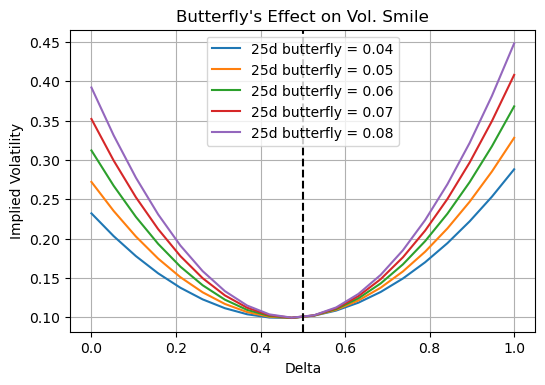

In [13]:
plt.figure(dpi=100)

sigma_atm = 0.10
sigma_rr25d = 0.028

x = np.linspace(0, 1, 20)
butterfly = [0.04, 0.05, 0.06, 0.07, 0.08]
for sigma_fly25d in butterfly:
    sigma_put = sigma_atm + 2*sigma_rr25d*(x - 0.5) + 16*sigma_fly25d*(x - 0.5)**2
    plt.plot(x, sigma_put, label = "25d butterfly = {:.2f}".format(sigma_fly25d))
    plt.legend()

plt.ylabel("Implied Volatility")
plt.xlabel("Delta")
plt.title("Butterfly's Effect on Vol. Smile")
plt.grid()
plt.axvline(x=0.5, linestyle='--', color = "black")
plt.show()

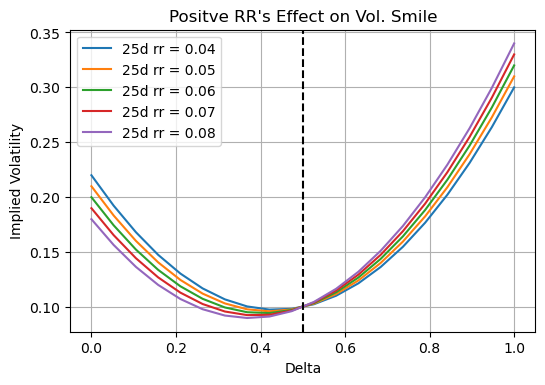

In [14]:
plt.figure(dpi=100)

sigma_atm = 0.10
sigma_fly25d = 0.04

x = np.linspace(0, 1, 20)
rr = [0.04, 0.05, 0.06, 0.07, 0.08]
for sigma_rr25d in butterfly:
    sigma_put = sigma_atm + 2*sigma_rr25d*(x - 0.5) + 16*sigma_fly25d*(x - 0.5)**2
    plt.plot(x, sigma_put, label = "25d rr = {:.2f}".format(sigma_rr25d))
    plt.legend()

plt.ylabel("Implied Volatility")
plt.xlabel("Delta")
plt.title("Positve RR's Effect on Vol. Smile")
plt.grid()
plt.axvline(x=0.5, linestyle='--', color = "black")
plt.show()

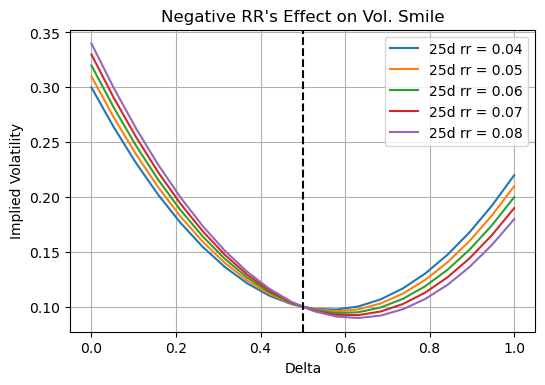

In [15]:
plt.figure(dpi=100)

sigma_atm = 0.10
sigma_fly25d = 0.04

x = np.linspace(0, 1, 20)
rr = [0.04, 0.05, 0.06, 0.07, 0.08]
for sigma_rr25d in butterfly:
    sigma_put = sigma_atm + -2*sigma_rr25d*(x - 0.5) + 16*sigma_fly25d*(x - 0.5)**2
    plt.plot(x, sigma_put, label = "25d rr = {:.2f}".format(sigma_rr25d))
    plt.legend()

plt.ylabel("Implied Volatility")
plt.xlabel("Delta")
plt.title("Negative RR's Effect on Vol. Smile")
plt.grid()
plt.axvline(x=0.5, linestyle='--', color = "black")
plt.show()

With a positive risk reversal, strikes above the ATM have a higher implied volatility than the equivalent delta strikes below the ATM. With a negative risk reversal, strikes below the ATM have a higher implied volatility than the equivalent delta strikes above the ATM.

### Market Instrument Vega Exposures
The reason for describing the volatility smile with ATM, butterfly, and risk reversal instruments becomes clearer when the implied volatility exposures of the three market instruments are examined. The key implied volatility exposures are:
- Vega $(\frac{\partial P}{\partial \sigma})$: sensitivity of price to changes in implied volatility.
- Vanna $(\frac{\partial \text{Vega}}{\partial S})$: sensitivity of vega to changes in spot, Vanna can also be thought of as the sensitivity of delta to changes in implied volatility, i.e. $(\frac{\partial \text{Delta}}{\partial \sigma})$.
- Volga $(\frac{\partial \text{Vega}}{\partial \sigma})$: sensitivity of vega to changes in implied volatility. Therefore, volga is to implied volatility as gamma is to spot and as the volatility of implied volatility rises, the expected P&L from a long volga trading position increases.

#### ATM Exposures
The vega profile for a long ATM vanilla option has a single peak around current spot. At higher volatility, the vega profile is wider since the spot distribution is wider, but vega is unchanged at the initial spot.

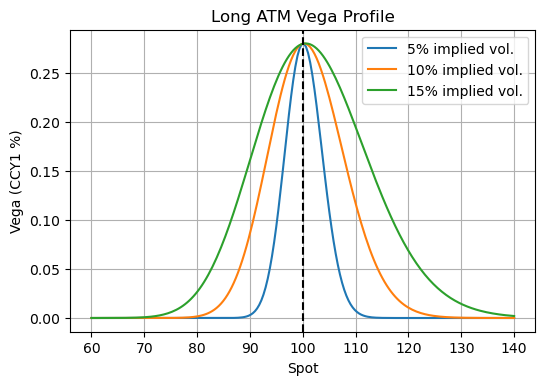

In [16]:
# Long ATM Vega Profile
plt.figure(dpi=100)

T =180/365
rCCY1 = 0
rCCY2 = 0
vol = [0.05, 0.1, 0.15] # change
S = np.linspace(60, 140, 200)
for sigma in vol:
    d1 = (np.log(S/K) + (rCCY2 - rCCY1 + sigma**2/2)*T)/(sigma*np.sqrt(T))
    vega = S*np.exp(-rCCY1*T)*norm.pdf(d1)*np.sqrt(T)/100
    plt.plot(S, vega, label = "{:.0f}% implied vol.".format(sigma*100))
    plt.legend()

plt.ylabel("Vega (CCY1 %)")
plt.xlabel("Spot")
plt.title("Long ATM Vega Profile")
plt.axvline(x= 100, linestyle='--', color = "black")
plt.grid()
plt.show()

Therefore, a long ATM contract **at inception** has the following exposures:
- Vega: positive exposure
- Vanna (the gradient of the vega vs spot graph): no exposure (gradient = 0 at inception)
- Volga (the difference between the vega profiles for different implied volatility levels at the initial spot level): no exposure

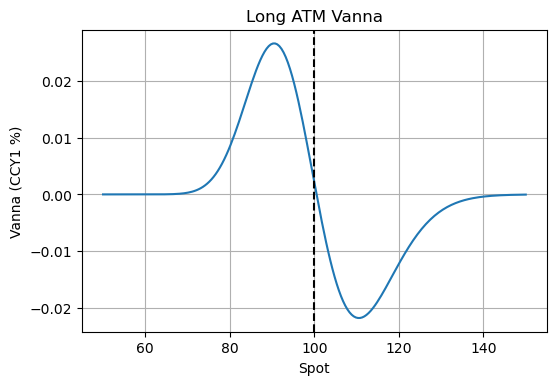

In [17]:
# Long ATM Vanna profile
plt.figure(dpi=100)

T = 1 
rCCY1 = 0
rCCY2 = 0
sigma = 0.1
S = np.linspace(50, 150, 200)
d1 = (np.log(S/K) + (rCCY2 - rCCY1 + sigma**2/2)*T)/(sigma*np.sqrt(T))
d2 = d1 - np.sqrt(T)*sigma
vega = S*np.exp(-rCCY1*T)*norm.pdf(d1)*np.sqrt(T)/100
vanna = -vega*d2/(S*sigma)
plt.plot(S, vanna)
plt.ylabel("Vanna (CCY1 %)")
plt.xlabel("Spot")
plt.title("Long ATM Vanna")
plt.axvline(x= 100, linestyle='--', color = "black")
plt.grid()
plt.show()

Consider an out-of-the-money topside call option (i.e. strike above spot). At current implied volatility, the strike has 25% delta. If implied volatility rises, the chance of the strike ending in-the-money at maturity increases as the distribution widens and hence delta ($\approx$ probability of ending ITM) rises. Therefore, this option has a long Vanna exposure.

Likewise, consider a downside (in-the-money) call strike. At current implied volatility, the strike has 75% delta. If implied volatility rises, the chance of the strike ending in-the-money at maturity decreases as the distribution widens and hence delta falls. Therefore, this option has a short Vanna exposure.

Volga with spot above or below the ATM strike is positive since long wing vanilla options generate positive Volga. The Volga profile from a long ATM option is shown below. 

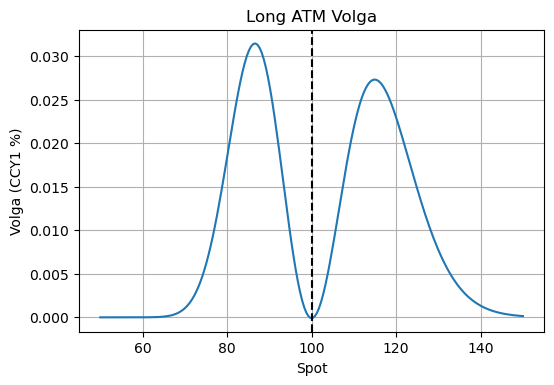

In [19]:
# Long ATM Volga profile
plt.figure(dpi=100)

T = 1 
rCCY1 = 0
rCCY2 = 0
sigma = 0.1
S = np.linspace(50, 150, 200)
d1 = (np.log(S/K) + (rCCY2 - rCCY1 + sigma**2/2)*T)/(sigma*np.sqrt(T))
d2 = d1 - np.sqrt(T)*sigma
vega = S*np.exp(-rCCY1*T)*norm.pdf(d1)*np.sqrt(T)/100
volga = vega*d1*d2/(S*sigma)
plt.plot(S, volga)
plt.ylabel("Volga (CCY1 %)")
plt.xlabel("Spot")
plt.title("Long ATM Volga")
plt.axvline(x= 100, linestyle='--', color = "black")
plt.grid()
plt.show()

#### Risk Reversal Exposures
For a risk reversal contract, higher implied volatility moves the Vega profile wider but at initial spot, the Vega exposure is unchanged at zero. It is important to understand that these exposure profiles are generated with fixed strikes, equivalent to calculating the exposures immediately after trading the contract.

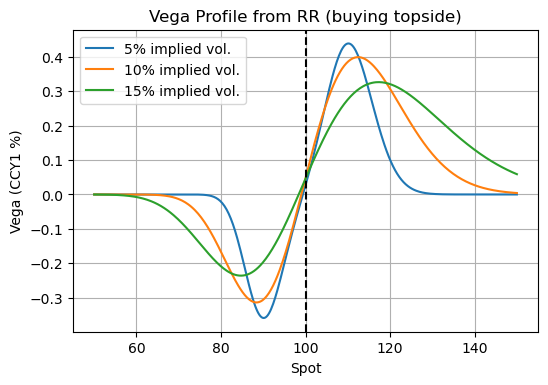

In [24]:
# Long RR Vega
plt.figure(dpi=100)

T =365/365
rCCY1 = 0
rCCY2 = 0
vol = [0.05, 0.1, 0.15] # change
S = np.linspace(50, 150, 400)

for sigma in vol:
    d1 = (np.log(S/(K+10)) + (rCCY2 - rCCY1 + sigma**2/2)*T)/(sigma*np.sqrt(T))
    call_vega = S*np.exp(-rCCY1*T)*norm.pdf(d1)*np.sqrt(T)/100
    d1 = (np.log(S/(K-10)) + (rCCY2 - rCCY1 + sigma**2/2)*T)/(sigma*np.sqrt(T))
    put_vega = S*np.exp(-rCCY1*T)*norm.pdf(d1)*np.sqrt(T)/100
    RR_vega = call_vega - put_vega
    
    plt.plot(S, RR_vega, label = "{:.0f}% implied vol.".format(sigma*100))
    plt.legend()
    
plt.ylabel("Vega (CCY1 %)")
plt.xlabel("Spot")
plt.title("Vega Profile from RR (buying topside)")
plt.axvline(x= 100, linestyle='--', color = "black")
plt.grid()
plt.show()

In this case, buying the risk reversal means buying the topside strike versus selling the downside strike but in different currency pairs or tenors this may be the other way around. Therefore, a long risk reversal position can give either a long or short Vanna exposure, depending on whether topside strikes are at higher or lower implied volatility than the equivalent delta downside strikes. If the topside strikes have a higher implied volatility, traders say the risk reversal is "for topside", whereas if downside strikes have a higher implied volatility, traders say the risk reversal is "for downside". In a currency pair where the risk reversal is for downside, a long risk reversal position initially gives a short Vanna position as shown below.

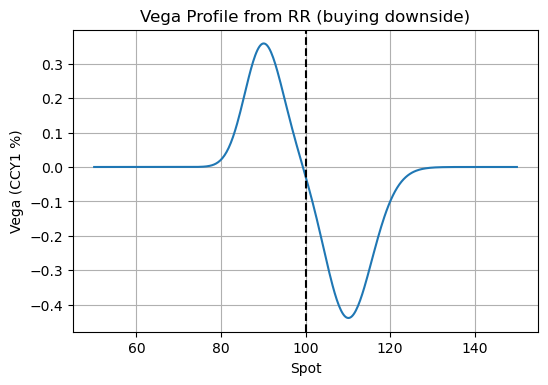

In [26]:
# Short RR Vega
plt.figure(dpi=100)

T =365/365
rCCY1 = 0
rCCY2 = 0
S = np.linspace(50, 150, 400)
sigma = 0.05
d1 = (np.log(S/(K+10)) + (rCCY2 - rCCY1 + sigma**2/2)*T)/(sigma*np.sqrt(T))
call_vega = S*np.exp(-rCCY1*T)*norm.pdf(d1)*np.sqrt(T)/100
d1 = (np.log(S/(K-10)) + (rCCY2 - rCCY1 + sigma**2/2)*T)/(sigma*np.sqrt(T))
put_vega = S*np.exp(-rCCY1*T)*norm.pdf(d1)*np.sqrt(T)/100
RR_vega = -call_vega  + put_vega

plt.plot(S, RR_vega)
    
plt.ylabel("Vega (CCY1 %)")
plt.xlabel("Spot")
plt.title("Vega Profile from RR (buying downside)")
plt.axvline(x= 100, linestyle='--', color = "black")
plt.grid()
plt.show()

Notice that these Vega profiles are not perfectly rotationally symmetric since Vega persists further to the topside. This occurs because the Black-Scholes formula is stated in log-return terms, which causes distances in spot space to compress toward zero. A stylized Vega versus spot log-return graph for a risk reversal is rotationally symmetric.

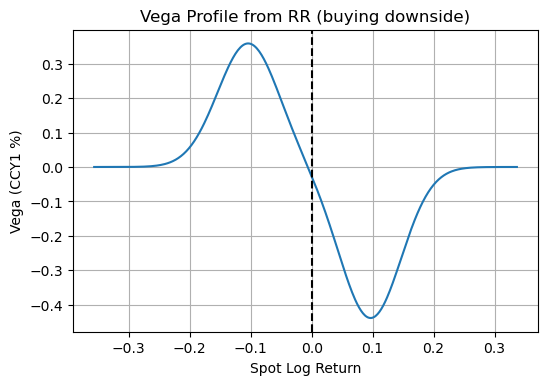

In [42]:
# Short RR Vega
plt.figure(dpi=100)

T =365/365
rCCY1 = 0
rCCY2 = 0
S = np.linspace(70, 140, 400)
sigma = 0.05
d1 = (np.log(S/(K+10)) + (rCCY2 - rCCY1 + sigma**2/2)*T)/(sigma*np.sqrt(T))
call_vega = S*np.exp(-rCCY1*T)*norm.pdf(d1)*np.sqrt(T)/100
d1 = (np.log(S/(K-10)) + (rCCY2 - rCCY1 + sigma**2/2)*T)/(sigma*np.sqrt(T))
put_vega = S*np.exp(-rCCY1*T)*norm.pdf(d1)*np.sqrt(T)/100
RR_vega = -call_vega  + put_vega

plt.plot(np.log(S/100), RR_vega)
    
plt.ylabel("Vega (CCY1 %)")
plt.xlabel("Spot Log Return")
plt.title("Vega Profile from RR (buying downside)")
plt.axvline(x= 0, linestyle='--', color = "black")
plt.grid()
plt.show()

The Vanna exposure on a risk reversal does not persist over all spot levels, Rather it is maximised at the initial spot as shown below.

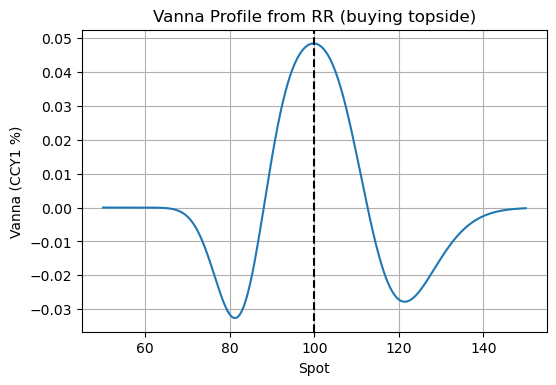

In [69]:
# Short RR Vega
plt.figure(dpi=100)

T =365/365
rCCY1 = 0
rCCY2 = 0
S = np.linspace(50, 150, 400)
sigma = 0.08
d1 = (np.log(S/(K + 12)) + (rCCY2 - rCCY1 + sigma**2/2)*T)/(sigma*np.sqrt(T))
d2 = d1 - sigma*np.sqrt(T)
call_vega = S*np.exp(-rCCY1*T)*norm.pdf(d1)*np.sqrt(T)/100
call_vanna = -call_vega*d2/(S*sigma)

d1 = (np.log(S/(K-12)) + (rCCY2 - rCCY1 + sigma**2/2)*T)/(sigma*np.sqrt(T))
d2 = d1 - sigma*np.sqrt(T)
put_vega = S*np.exp(-rCCY1*T)*norm.pdf(d1)*np.sqrt(T)/100
put_vanna = put_vega*d2/(S*sigma)
RR_vanna = call_vanna  + put_vanna

plt.plot(S, RR_vanna)
    
plt.ylabel("Vanna (CCY1 %)")
plt.xlabel("Spot")
plt.title("Vanna Profile from RR (buying topside)")
plt.axvline(x= 100, linestyle='--', color = "black")
plt.grid()
plt.show()

Therefore, a long risk reversal contract **at inception** has the following exposures:
- Vega: no exposure
- Vanna: positive or negative exposure, depending on whether the risk reversal is "for topside" or "for downside" (i.e., whether topside or downside strikes are priced at higher implied volatility within the volatility smile)
- Volga: no exposure

#### Butterfly Exposures
A long butterfly contract is constructed using a long strangle (long wings) and a short straddle (ATM) with the ATM notional set such that the structure is initially Vega-neutral and the call, put legs in the strangle have the same notional and delta. The Vega profile from a long butterfly is shown below,

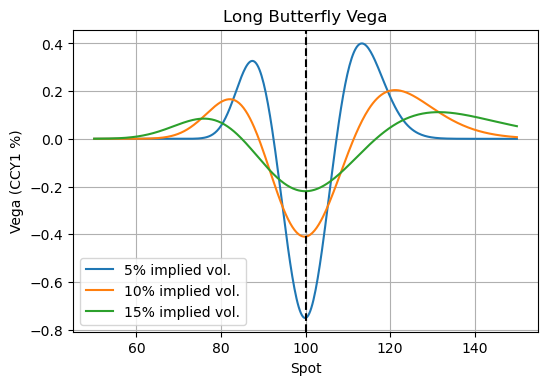

In [95]:
# Long Butterfly Vega
plt.figure(dpi=100)

T = 365/365
S = np.linspace(50, 150, 400)
vol = [0.05, 0.1, 0.15] # change

for sigma in vol:
    d1 = (np.log(S/(K)) + (rCCY2 - rCCY1 + sigma**2/2)*T)/(sigma*np.sqrt(T))
    call_vega = S*np.exp(-rCCY1*T)*norm.pdf(d1)*np.sqrt(T)/100
    put_vega = S*np.exp(-rCCY1*T)*norm.pdf(d1)*np.sqrt(T)/100
    straddle_vega = call_vega + put_vega

    d1 = (np.log(S/(K+12)) + (rCCY2 - rCCY1 + sigma**2/2)*T)/(sigma*np.sqrt(T))
    call_vega = S*np.exp(-rCCY1*T)*norm.pdf(d1)*np.sqrt(T)/100
    d1 = (np.log(S/(K-12)) + (rCCY2 - rCCY1 + sigma**2/2)*T)/(sigma*np.sqrt(T))
    put_vega = S*np.exp(-rCCY1*T)*norm.pdf(d1)*np.sqrt(T)/100
    strangle_vega = call_vega + put_vega

    butterfly_vega = strangle_vega - straddle_vega
    plt.plot(S, butterfly_vega, label = "{:.0f}% implied vol.".format(sigma*100))
    plt.legend()
    
plt.ylabel("Vega (CCY1 %)")
plt.xlabel("Spot")
plt.title("Long Butterfly Vega")
plt.axvline(x= 100, linestyle='--', color = "black")
plt.grid()
plt.show()

The Volga exposure on a butterfly does not persist over all spot levels. Rather it is maximized at the initial spot as shown below.

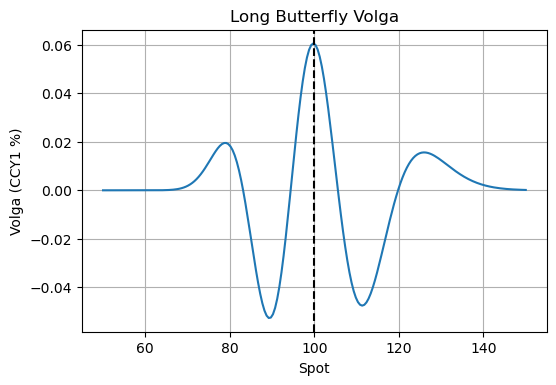

In [99]:
# Long ATM Volga profile
plt.figure(dpi=100)

T = 1 
rCCY1 = 0
rCCY2 = 0
sigma = 0.08
S = np.linspace(50, 150, 200)

# Straddle
d1 = (np.log(S/(K)) + (rCCY2 - rCCY1 + sigma**2/2)*T)/(sigma*np.sqrt(T))
d2 = d1 - np.sqrt(T)*sigma
call_vega = S*np.exp(-rCCY1*T)*norm.pdf(d1)*np.sqrt(T)/100
call_volga =  call_vega*d1*d2/(S*sigma)
put_vega = S*np.exp(-rCCY1*T)*norm.pdf(d1)*np.sqrt(T)/100
put_volga =  put_vega*d1*d2/(S*sigma)
straddle_volga = call_volga + put_volga

# Strangle
d1 = (np.log(S/(K+8)) + (rCCY2 - rCCY1 + sigma**2/2)*T)/(sigma*np.sqrt(T))
d2 = d1 - np.sqrt(T)*sigma
call_vega = S*np.exp(-rCCY1*T)*norm.pdf(d1)*np.sqrt(T)/100
call_volga =  call_vega*d1*d2/(S*sigma)
d1 = (np.log(S/(K-8)) + (rCCY2 - rCCY1 + sigma**2/2)*T)/(sigma*np.sqrt(T))
d2 = d1 - np.sqrt(T)*sigma
put_vega = S*np.exp(-rCCY1*T)*norm.pdf(d1)*np.sqrt(T)/100
put_volga =  put_vega*d1*d2/(S*sigma)
strangle_volga = call_volga + put_volga

butterfly_volga = strangle_volga - straddle_volga
    

plt.plot(S, butterfly_volga )
plt.ylabel("Volga (CCY1 %)")
plt.xlabel("Spot")
plt.title("Long Butterfly Volga")
plt.axvline(x= 100, linestyle='--', color = "black")
plt.grid()
plt.show()

A long butterfly contract **at inception** has the following exposures:
- Vega: no exposure (by construction)
- Vanna: no exposure
- Volga: positive exposure

#### Summary: Market Instrument Vega Exposures
| Instrument/Exposure | Vega | Vanna | Volga |
| --- | --- | --- | --- |
| ATM | +ve | 0 | 0|
| RR | 0 | +ve | 0|
| Fly | 0 | 0 | +ve |

In practice, this means:
- ATM contracts are used to trade the level of implied volatility because their main exposure at inception is Vega ($\frac{\partial P}{\partial \sigma}$).
- RR contracts are used to trade the spot versus implied volatility relationship because their main exposure at inception is Vanna ($\frac{\partial \Delta}{\partial \sigma}$ or $\frac{\partial \text{Vega}}{\partial S}$).
- Fly contracts are used to the trade volatility of implied volatility because their main exposure at inception is Volga ($\frac{\partial \text{Vega}}{\partial \sigma}$).

Finally, it is mildly interesting to observe that the Vanna profile of the ATM takes the same shape as the Vega profile of the risk reversal while the Volga of the ATM takes the same shape as the Vega of the butterfly.

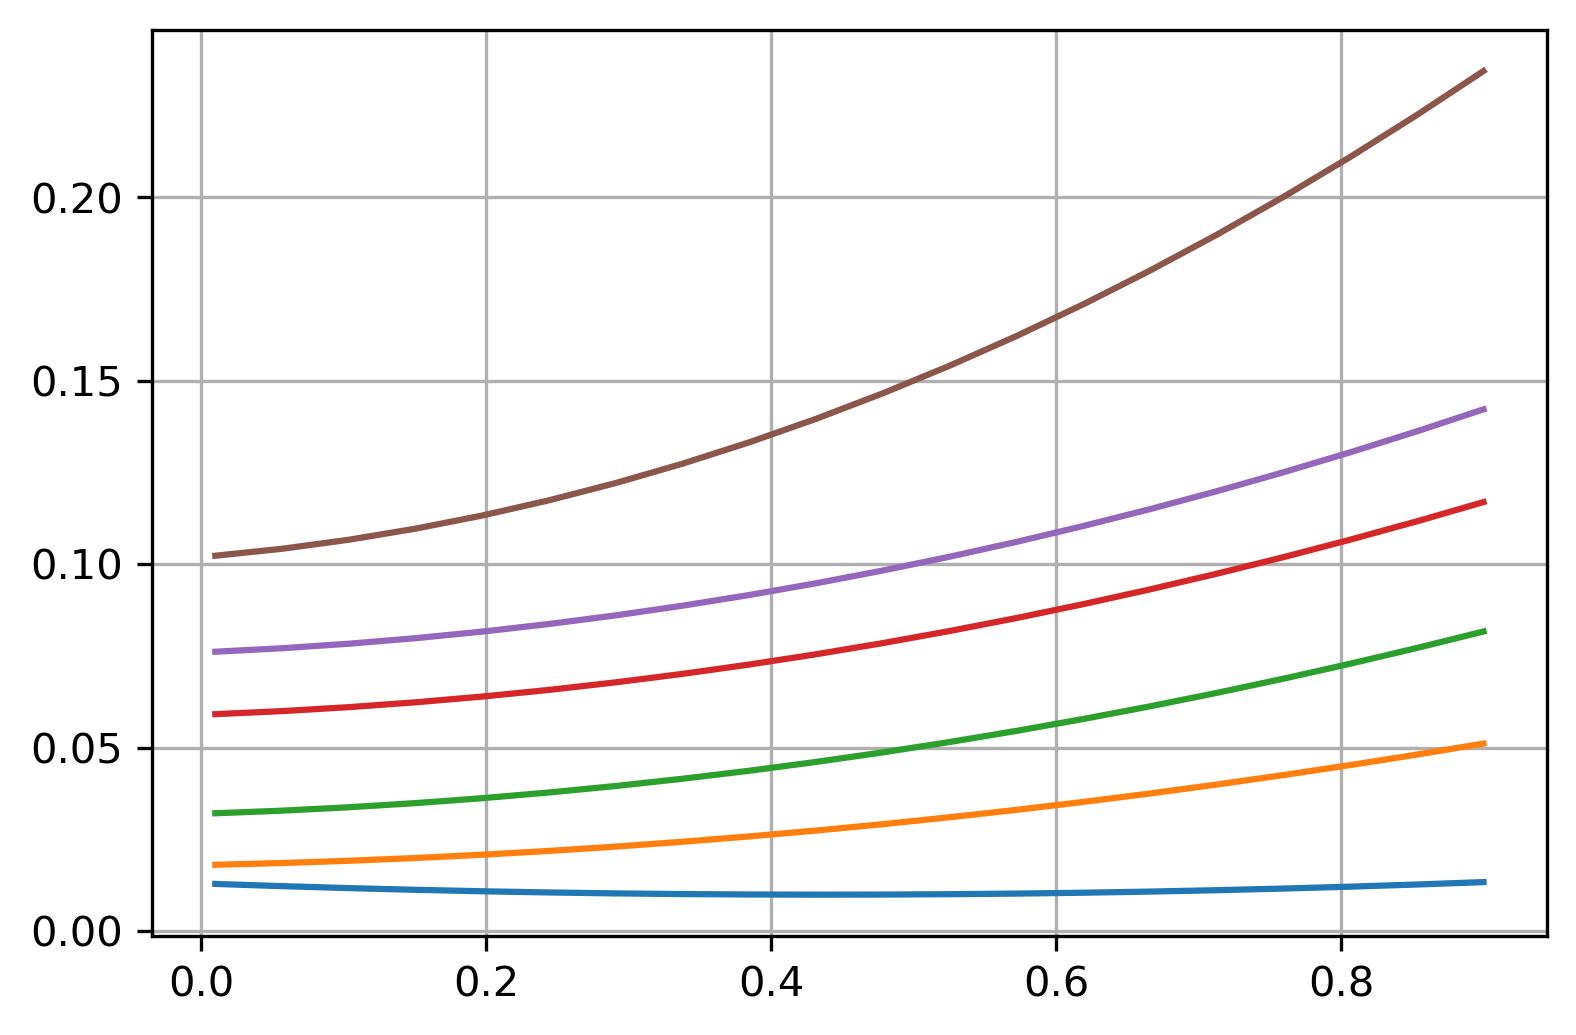

In [42]:
import numpy as np
import matplotlib.pyplot as plt

i = 0
vol_atm = [0.01, 0.03, 0.05, 0.08, 0.1, 0.15]
vol_rr25d = [0.001, 0.02, 0.03, 0.035, 0.04, 0.08]
vol_fly25d= [0.001, 0.002, 0.003, 0.0035, 0.004, 0.008]

x = np.linspace(0.01, 0.9, 20)
plt.figure(dpi = 300)

for i in range(len(vol_atm)):
    vol_put = vol_atm[i] + 2*vol_rr25d[i]*(x -0.5) + 16*vol_fly25d[i]*(x - 0.5)**2
    
    plt.plot(x, vol_put)
    
plt.grid()
plt.show()

In [77]:
np.sqrt(0.12**2 * (7/365) *6/5 / (8/365)) 

0.12296340919151517

In [2]:
a = [1,2,3]
b = [2,3,4]
c = [3,5]
list(set(list(set(a) | set(b))) - set(c))

[1, 2, 4]

In [43]:
import holidays
from datetime import datetime

In [44]:
datetime.strptime('23-11-2007', '%d-%m-%Y') in holidays.country_holidays("Japan")

True

In [40]:
for dates in holidays.CountryHoliday("Japan", years=np.arange(2007,2008,1)).keys():
    print(dates)

2007-01-01
2007-01-08
2007-02-11
2007-03-21
2007-04-29
2007-05-03
2007-05-04
2007-05-05
2007-07-16
2007-09-17
2007-09-23
2007-10-08
2007-11-03
2007-11-23
2007-12-23
2007-02-12
2007-04-30
2007-09-24
2007-12-24


# Swap Calculation

\begin{align*}
\text{Swap (base currency)} &= \text{Swap rate} \times \text{lots (volume)} \times \text{no. of nights}
\end{align*}

For example,
1. A BUY 1.00 lot EURUSD position held from Monday to Tuesday has swap:
\begin{align*}
\text{Swap (base currency)} &= \text{Swap rate} \times \text{lots (volume)} \times \text{no. of nights} \\
&= -4.3 \times 1.00 \times 1 \\
&=  -4.3 \text{ (EUR)} \\
\text{Swap (foreign currency)} &=  -4.3 \times \text{EURUSD FX spot} \text{  (USD)}
\end{align*}


2. A SELL 2.00 lot USDJPY position held from Wednesday to Thursday has swap:
\begin{align*}
\text{Swap (base currency)} &= \text{Swap rate} \times \text{lots (volume)} \times \text{no. of nights} \\
&= -4.79 \times 2.00 \times 3 \\
&=  -28.74 \text{ (USD)} \\
\end{align*}


In the first example, we can convert swap in EUR (base currency) to USD by multiplying current FX spot. In the second example, the base currency is USD so we do not need to apply conversion. Note that from Wednesday to Thursday there will be triple-swap charges. 

In [55]:
-4.79*3*2

-28.740000000000002